In [1]:
import pandas as pd
import numpy as np
import os
import sys
import Mixture
import multiprocessing

#Library to read RDS format
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from random import seed
from random import sample 
from random import randint

/home/jcva/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/home/jcva/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
print('Num cores: ' + str(multiprocessing.cpu_count()))

cores = 24
iters = 1000

if cores > multiprocessing.cpu_count():
    cores = multiprocessing.cpu_count()

Num cores: 24


In [3]:
# Read RDS file
readRDS = robjects.r['readRDS']
dfEpic = readRDS('./EPICsig.betas.noise.list.rds')

In [4]:
# Read RDS file
readRDS = robjects.r['readRDS']
dfTil10 = readRDS('data/TIL10.betas.noise.list.rds')

In [3]:
# Read RDS file
readRDS = robjects.r['readRDS']
dfLm22 = readRDS('data/betas.noise.list.rds')

In [ ]:
dfTil9 = pd.read_excel('data/betas.list.TIL9.xlsx')

In [88]:
dfTil9 = dfTil9.iloc[:, 1:]

In [83]:
til9 = pd.read_excel('data/TIL9_signature.xlsx', sheet_name = 0)

In [84]:
X = til9.iloc[:, 1:]

In [85]:
vector = X.to_numpy(copy=True)    
vector = vector.flatten()

In [99]:
A = np.dot(X, dfTil9).T + vector[sample(range(len(vector)), len(X.index))]

In [104]:
# Getting expression matrix
vector = [x for x in A]
columns = ['V' + str(x+1) for x in range(len(A))]
YTil9 = pd.DataFrame(np.column_stack(vector), columns=columns)
YTil9.insert(0, 'Gene symbol', til9['Gene symbol'])

In [105]:
YTil9

,Gene symbol,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V991,V992,V993,V994,V995,V996,V997,V998,V999,V1000
0,ARID5B,2242.063708,2242.579006,2694.689423,2598.833456,2857.787226,2593.871236,2242.349678,2241.339125,2677.898211,...,3408.830510,2241.249149,2240.926261,2655.323485,2617.015223,2244.625408,2612.452688,2242.357377,2240.632500,2843.040843
1,ZNF460,20.769874,20.558469,207.602813,168.918604,274.975292,165.117016,20.505215,20.855869,199.718088,...,502.036357,20.459030,19.961709,190.742274,176.099960,20.523755,173.168295,20.189697,19.640656,268.601464
2,RBM47,625.754798,641.191413,625.857852,597.875851,602.995672,628.688966,623.611880,600.920829,632.338599,...,652.005841,598.910066,600.732054,645.913966,594.690594,701.072007,636.376383,638.596732,593.138393,603.054177
3,GRN,3143.502942,3322.691685,2397.228534,1288.582494,1686.885960,2073.519814,2195.293203,1609.843444,2358.295808,...,2662.435383,1267.400442,882.944297,3008.543868,1215.953746,6762.938576,3297.161165,2401.890096,286.222016,1585.687901
4,CTSB,5599.360778,5786.335181,4785.647961,3882.920604,4362.193264,4726.152488,4611.990321,4234.780054,4901.757028,...,4732.937504,3878.549033,3453.226553,5550.617386,3828.839038,9782.676102,6065.650784,4855.713521,2826.973118,4281.338254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12360,OR2L2,1132.527672,1133.294548,1135.340980,1133.475280,1135.507238,1134.522524,1133.574038,1132.547750,1135.744669,...,1138.849268,1132.454123,1132.059618,1135.880899,1133.707931,1135.327120,1134.592486,1133.538606,1131.687360,1135.953262
12361,GCSAML,73.049626,74.961499,77.787293,79.730124,76.247885,74.635447,76.535128,77.800758,75.183839,...,78.603613,77.550644,75.530632,77.523061,80.094540,72.456129,74.546871,76.048491,77.543125,76.249452
12362,TMEM231,2903.578852,2901.493124,2900.517485,2901.374303,2901.357840,2899.571864,2900.965803,2902.152298,2899.534684,...,2897.481628,2901.444262,2900.955726,2899.057824,2900.953177,2900.935159,2901.027592,2899.747475,2899.729002,2900.929120
12363,ZNF155,39.787162,41.954878,53.448073,51.141836,53.635610,49.373377,39.911397,39.238758,50.679147,...,76.617998,38.064493,38.102687,54.019319,49.404083,46.096577,50.518599,42.615118,37.085506,52.021205


In [9]:
subject = dfEpic

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
YEpic = pd.DataFrame(np.column_stack(vector), columns=columns)
YEpic.insert(0, 'Gene symbol', subject[0][2].rownames)

In [ ]:
subject = dfTil10

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
YTil10 = pd.DataFrame(np.column_stack(vector), columns=columns)
YTil10.insert(0, 'Gene symbol', subject[0][2].rownames)

In [4]:
subject = dfLm22

# Getting expression matrix
vector = [x[2] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
YLm22 = pd.DataFrame(np.column_stack(vector), columns=columns)
YLm22.insert(0, 'Gene symbol', subject[0][2].rownames)

In [108]:
import score

In [ ]:
#Epic
X = pd.read_excel('EPICsig_signature.xlsx', sheet_name = 0)

In [119]:
X = X.iloc[:, 1:]

In [120]:
if __name__ == '__main__':
    resultEpic, pvaluesEpic = Mixture.Mixture(X, YEpic, cores, iters, 'outputEpicNoise', score.Score)

Running mixer with subjects (Count: 1001)...
Processing...
Subject V1 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V2 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Subject V3 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Subject V4 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V2
Subject V5 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V1
Subject V6 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V4
Subject V7 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V3
Subject V8 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V5
Subject V9 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V7
Subject V11 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V8
Subject V13 Processin

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V23
Subject V24 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V21
Finish proccess subject V18
Finish proccess subject V20
Subject V22 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V25 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Subject V27 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V24
Subject V29 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V22
Subject V31 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V25
Subject V26 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V27
Subject V28 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V31
Subject V32 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V29
Subject V30 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V26
Subject V33 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V28
Subject V35 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V32
Subject V37 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V30
Subject V39 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V33
Subject V34 Processing...<ForkProcess(ForkPoolWorker-1

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V85
Subject V86 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V89
Subject V90 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V87
Subject V88 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V91
Subject V92 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V90
Subject V93 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V86
Subject V95 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V92
Subject V97 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V88
Subject V99 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V95
Subject V96 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V93
Subject V94 Processing...<ForkProcess(ForkPoolWorker-1

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V100
Subject V107 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V103
Subject V104 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V105
Subject V106 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V101
Subject V102 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V107
Subject V108 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V104
Subject V109 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V106
Subject V111 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V102
Subject V113 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V108
Subject V115 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V109
Subject V110 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V113
Subject V114 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V110
Subject V117 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V112
Subject V119 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V115
Subject V116 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V114
Subject V121 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V117
Subject V118 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V116
Subject V123 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V119
Subject V120 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V118
Subject V125 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V121
Subject V122 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V131
Subject V132 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V133
Subject V134 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V132
Finish proccess subject V130
Finish proccess subject V128
Subject V135 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V137 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Subject V139 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V137
Subject V138 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V139
Subject V140 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V134
Subject V141 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V135
Subject V136 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V138
Subject V143 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V140
Subject V145 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V136
Subject V147 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V141
Subject V142 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V145
Subject V146 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V143
Subject V144 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V163
Subject V164 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V157
Subject V158 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V159
Subject V160 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V161
Subject V162 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V164
Subject V165 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V160
Subject V167 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V158
Subject V169 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V162
Subject V171 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V165
Subject V166 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V171
Subject V172 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V184
Subject V195 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V189
Subject V190 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V191
Subject V192 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V193
Subject V194 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V190
Subject V197 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V192
Subject V199 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V195
Subject V196 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V194
Subject V201 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V197
Subject V198 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V196
Subject V203 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V241
Subject V242 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V243
Subject V244 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V238
Subject V245 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V239
Subject V240 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V242
Subject V247 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V244
Subject V249 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V245
Subject V246 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V240
Subject V251 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V249
Subject V250 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V247
Subject V248 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V262
Subject V267 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V265
Subject V266 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V260
Subject V269 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V264
Subject V271 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V267
Subject V268 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V266
Finish proccess subject V271
Subject V272 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V273 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V269
Subject V270 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V268
Subject V275 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V272
Subject V277 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V309
Subject V310 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V311
Subject V312 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V313
Finish proccess subject V307
Subject V314 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V308 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V312
Subject V315 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V310
Subject V317 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V308
Subject V319 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V314
Subject V321 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V315
Subject V316 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V317
Subject V318 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V331
Subject V332 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V328
Subject V335 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V330
Subject V337 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V333
Subject V334 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V335
Subject V336 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V332
Subject V339 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V337
Subject V338 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V334
Subject V341 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V339
Subject V340 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V338
Subject V343 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V375
Subject V376 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V377
Subject V378 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V374
Subject V381 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V379
Subject V380 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V376
Subject V383 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V378
Subject V385 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V381
Subject V382 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V380
Finish proccess subject V383
Subject V387 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V384 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V385
Subject V386 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V394
Subject V399 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V395
Subject V396 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V397
Subject V398 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V392
Subject V401 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V399
Subject V400 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V396
Finish proccess subject V398
Subject V403 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V405 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V401
Subject V402 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V400
Subject V407 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V403
Subject V404 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V425
Subject V426 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V427
Subject V428 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V429
Subject V430 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V424
Subject V431 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V426
Subject V433 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V428
Subject V435 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V430
Subject V437 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V431
Subject V432 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V433
Subject V434 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V435
Subject V436 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V434
Subject V439 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V432
Subject V441 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V436
Subject V443 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V438
Subject V445 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V439
Subject V440 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V443
Subject V444 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V441
Subject V442 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V445
Subject V446 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V444
Subject V447 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V440
Subject V449 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V442
Subject V451 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V446
Subject V453 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V447
Subject V448 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V451
Subject V452 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V449
Subject V450 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V453
Subject V454 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V462
Finish proccess subject V458
Subject V465 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V467 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V463
Subject V464 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V460
Subject V469 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V464
Finish proccess subject V465
Subject V466 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V471 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V467
Subject V468 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V469
Subject V470 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V466
Subject V473 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V471
Subject V472 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V472
Subject V479 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V473
Subject V474 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V477
Finish proccess subject V475
Subject V478 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Subject V476 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V478
Subject V481 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V474
Subject V483 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V476
Subject V485 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V479
Subject V480 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V483
Subject V484 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V485
Subject V486 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V481
Subject V482 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V480
Subject V487 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V484
Subject V489 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V482
Subject V491 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V494
Subject V499 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V495
Finish proccess subject V497
Subject V496 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V498 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V492
Subject V501 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V499
Subject V500 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V498
Subject V503 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V496
Subject V505 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V501
Subject V502 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V500
Subject V507 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V503
Subject V504 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V505
Subject V506 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V502
Subject V509 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V507
Subject V508 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V504
Subject V511 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V568
Subject V573 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V566
Subject V575 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V571
Subject V572 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V570
Subject V577 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V573
Subject V574 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V575
Subject V576 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V572
Subject V579 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V577
Subject V578 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V576
Subject V581 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V579
Subject V580 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V601
Subject V602 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V603
Subject V604 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V598
Subject V605 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V600
Subject V607 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V602
Subject V609 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V604
Subject V611 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V605
Subject V606 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V607
Subject V608 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V609
Subject V610 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V611
Subject V612 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V615
Subject V616 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V617
Subject V618 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V619
Subject V620 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V613
Subject V614 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V616
Subject V621 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V618
Subject V623 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V620
Subject V625 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V614
Subject V627 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V621
Subject V622 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V625
Subject V626 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V627
Subject V628 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V623
Subject V624 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V622
Subject V629 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V626
Subject V631 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V628
Subject V633 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V624
Subject V635 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V629
Subject V630 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V631
Subject V632 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V633
Subject V634 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V657
Subject V658 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V659
Subject V660 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V654
Subject V661 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V655
Subject V656 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V660
Subject V663 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V661
Subject V662 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V656
Subject V665 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V658
Subject V667 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V662
Subject V669 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V665
Subject V666 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V716
Subject V721 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V717
Subject V718 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V714
Subject V723 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V719
Subject V720 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V721
Subject V722 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V718
Finish proccess subject V723
Subject V725 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Subject V724 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V720
Subject V727 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V725
Subject V726 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V724
Subject V729 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V733
Subject V734 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V732
Subject V735 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V728
Subject V737 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V730
Subject V739 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V735
Subject V736 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V734
Subject V741 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V737
Subject V738 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V739
Finish proccess subject V736
Subject V740 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Subject V743 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V741
Subject V742 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V773
Subject V774 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V775
Subject V776 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V777
Subject V778 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V774
Subject V779 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V776
Subject V781 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V772
Subject V783 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V778
Subject V785 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V779
Subject V780 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V781
Subject V782 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V785
Subject V786 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V801
Subject V802 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V798
Subject V805 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V800
Subject V807 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V803
Subject V804 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V802
Subject V809 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V805
Subject V806 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V804
Subject V811 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V807
Subject V808 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V809
Subject V810 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V806
Subject V813 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V812
Subject V817 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V815
Subject V816 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V810
Subject V819 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V814
Subject V821 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V817
Subject V818 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V816
Subject V823 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V819
Subject V820 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V821
Subject V822 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V823
Subject V824 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V818
Subject V825 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V840
Subject V843 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V838
Finish proccess subject V836
Subject V845 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Subject V847 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V841
Subject V842 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V845
Subject V846 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V843
Subject V844 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V847
Subject V848 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V842
Subject V849 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V846
Subject V851 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V848
Subject V853 Processing...<ForkProc

Finish proccess subject V921
Subject V922 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V919
Subject V920 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V916
Subject V923 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V918
Subject V925 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V920
Subject V927 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V922
Subject V929 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V923
Subject V924 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V925
Subject V926 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V927
Subject V928 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V929
Subject V930 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V924
Subject V931 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V926
Subject V933 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V931
Finish proccess subject V928
Subjec

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V930
Subject V937 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V932
Subject V939 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V933
Subject V934 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V937
Subject V938 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V935
Subject V936 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V939
Subject V940 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V938
Subject V941 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V934
Subject V943 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V936
Subject V945 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V940
Subject V947 Processing...<ForkProc

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject V979
Subject V980 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V974
Subject V983 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V977
Subject V978 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V981
Subject V982 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V983
Subject V984 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V980
Subject V985 Processing...<ForkProcess(ForkPoolWorker-18, started daemon)>
Finish proccess subject V978
Subject V987 Processing...<ForkProcess(ForkPoolWorker-19, started daemon)>
Finish proccess subject V982
Subject V989 Processing...<ForkProcess(ForkPoolWorker-17, started daemon)>
Finish proccess subject V984
Subject V991 Processing...<ForkProcess(ForkPoolWorker-20, started daemon)>
Finish proccess subject V985
Subject V986 Processing...<ForkProc

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 30 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 34 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
Creating Subject: 37 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 27 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 31 Nro. Processor: <ForkPr

--------------------------------------------------
--------------------------------------------------
Creating Subject: 62 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
Creating Subject: 76 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 69 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 84 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 63 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 77 Nro. Processor: <ForkProcess(ForkPoolWo

--------------------------------------------------
Creating Subject: 111 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 121 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 119 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 122 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 136 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
----

--------------------------------------------------
Creating Subject: 132 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 177 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 147 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 162 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 133 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Crea

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 236 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
Creating Subject: 191 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 206 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 221 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 237 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
----

--------------------------------------------------
Creating Subject: 249 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 280 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 312 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 281 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
Creating Subject: 250 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
Creating Subject: 344 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
-------------------

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 323 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
Creating Subject: 354 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 291 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
Creating Subject: 261 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 324 Nro. Processor: <F

Creating Subject: 301 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 334 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 365 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 272 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 302 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Crea

--------------------------------------------------
Creating Subject: 378 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
Creating Subject: 440 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 472 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
Creating Subject: 410 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 441 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
Creating Subject: 379 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
-------------------

--------------------------------------------------
Creating Subject: 482 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
Creating Subject: 389 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 420 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
Creating Subject: 452 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 483 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 390 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 4

--------------------------------------------------
Creating Subject: 431 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 493 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
Creating Subject: 400 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 463 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 494 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
Crea

Creating Subject: 506 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 569 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 538 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
Creating Subject: 601 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 507 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 570 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 517 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
Creating Subject: 612 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 549 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
Creating Subject: 580 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 518 Nro. Processor: <F

Creating Subject: 528 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 590 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 623 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 560 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 529 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 591 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
-------------------

Creating Subject: 697 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 667 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 729 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 636 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 698 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
Crea

Creating Subject: 739 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 708 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 647 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 678 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 740 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Crea

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 689 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 750 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 719 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 658 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 751 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Crea

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 826 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
Creating Subject: 765 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 857 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 796 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 766 Nro. Processor: <F

Creating Subject: 806 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 837 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
Creating Subject: 776 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 807 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 868 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 838 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 816 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Creating Subject: 848 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 788 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
Creating Subject: 879 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 817 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
Crea

Creating Subject: 901 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
Creating Subject: 904 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 903 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 905 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
Creating Subject: 906 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 908 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 945 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
--------------------------------------------------
Creating Subject: 948 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
Creating Subject: 947 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 950 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 949 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
----

Creating Subject: 989 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 987 Nro. Processor: <ForkProcess(ForkPoolWorker-24, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 992 Nro. Processor: <ForkProcess(ForkPoolWorker-22, started daemon)>
Creating Subject: 991 Nro. Processor: <ForkProcess(ForkPoolWorker-21, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 994 Nro. Processor: <ForkProcess(ForkPoolWorker-23, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 993 Nro. Processor: <ForkProcess(Fork

Subject 61 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 61
Subject 64 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 59
Finish proccess subject 57
Finish proccess subject 62
Subject 66 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Subject 63 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Subject 68 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 64
Subject 65 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 66
Finish proccess subject 68
Subject 67 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Subject 69 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 63
Subject 70 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 65
Subject 72 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 69


/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject 101
Subject 108 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 104
Finish proccess subject 106
Subject 105 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Subject 107 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 102
Subject 103 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 108
Subject 109 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 107
Subject 110 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 105
Subject 112 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 103
Subject 114 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 110
Subject 111 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 109
Subject 116 Processing...<ForkProcess(ForkPoolWorker-2

Finish proccess subject 181
Finish proccess subject 184
Subject 188 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Subject 185 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 186
Subject 187 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 183
Subject 190 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 185
Finish proccess subject 188
Subject 189 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Subject 192 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 187
Subject 194 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 190
Subject 191 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 192
Finish proccess subject 189
Subject 193 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Subject 196 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/MixturePy/score.py:73: RuntimeWarning: invalid value encountered in true_divide
  w = score/sum(score)
/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Finish proccess subject 224
Subject 225 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 221
Subject 228 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 223
Subject 230 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 226
Subject 227 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 225
Subject 232 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 230
Subject 231 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 228
Subject 229 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 227
Subject 234 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 232
Subject 233 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 231
Subject 236 Processing...<ForkProcess(ForkPoolWorker-2

Finish proccess subject 304
Subject 305 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 306
Subject 307 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 303
Subject 310 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 305
Subject 312 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 308
Subject 309 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 307
Subject 314 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 312
Subject 313 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 309
Finish proccess subject 310
Subject 311 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Subject 316 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 314
Subject 315 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/MixturePy/score.py:73: RuntimeWarning: invalid value encountered in true_divide
  w = score/sum(score)


Subject 328 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 323
Subject 330 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Finish proccess subject 326
Subject 327 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 325
Subject 332 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 328
Subject 329 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 330
Subject 331 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 327
Subject 334 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 332
Subject 333 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 329
Subject 336 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 331
Subject 338 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 334
Subject 335 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 333
Subject 340 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/MixturePy/score.py:73: RuntimeWarning: invalid value encountered in true_divide
  w = score/sum(score)
/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Finish proccess subject 335


/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Subject 342 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 340
Subject 341 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 339
Subject 344 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 337
Subject 346 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 342
Subject 343 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 344
Subject 345 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 341
Subject 348 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 346
Subject 347 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 343
Subject 350 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 345
Subject 352 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish p

Finish proccess subject 417
Subject 424 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 420
Subject 421 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 422
Subject 423 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 419
Subject 426 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 424
Subject 425 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 421
Subject 428 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 423
Subject 430 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 425
Finish proccess subject 426
Subject 432 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Subject 427 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 428
Subject 429 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/MixturePy/score.py:73: RuntimeWarning: invalid value encountered in true_divide
  w = score/sum(score)


Finish proccess subject 469
Subject 476 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Finish proccess subject 472


/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Subject 473 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 471
Subject 478 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 474
Subject 475 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 476
Subject 477 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 473
Subject 480 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 478
Subject 479 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 475
Subject 482 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 477
Subject 484 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 480
Subject 481 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 479
Subject 486 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish p

Finish proccess subject 554
Subject 555 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 556
Subject 557 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 551
Subject 558 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 553
Subject 560 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 555
Subject 562 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 557
Subject 564 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 558
Subject 559 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 560
Subject 561 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 562
Subject 563 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 564
Subject 565 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/MixturePy/score.py:73: RuntimeWarning: invalid value encountered in true_divide
  w = score/sum(score)


Finish proccess subject 629
Subject 636 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Finish proccess subject 630
Subject 631 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 632
Subject 633 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 634
Subject 635 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 636
Subject 637 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 631
Subject 638 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 633
Subject 640 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 635
Subject 642 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 637
Subject 644 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 638
Subject 639 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 640
Subject 641 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject 664
Subject 665 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 666
Finish proccess subject 662
Subject 667 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Subject 663 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 661
Subject 668 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 667
Subject 670 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 663
Subject 672 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 665
Subject 674 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 668
Subject 669 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 672
Subject 673 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 670
Subject 671 Processing...<ForkProcess(ForkPoolWorker-2

/home/jcva/MixturePy/score.py:73: RuntimeWarning: invalid value encountered in true_divide
  w = score/sum(score)


Finish proccess subject 695
Subject 702 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 697
Subject 704 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 699
Subject 706 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>


/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jcva/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Finish proccess subject 700
Subject 701 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 706
Subject 707 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 704
Subject 705 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 702
Subject 703 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 701
Subject 708 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 707
Finish proccess subject 705
Subject 710 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Subject 712 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 703
Subject 714 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 708
Subject 709 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 710
Finish proccess subject 712
Subject 711 Processing...<

/home/jcva/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finish proccess subject 764
Subject 765 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 763
Subject 770 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 766
Subject 767 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 765
Subject 772 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 768
Subject 769 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 770
Finish proccess subject 767
Subject 771 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Subject 774 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 772
Subject 773 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 769
Subject 776 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 774
Subject 775 Processing...<ForkProcess(ForkPoolWorker-2

Finish proccess subject 846
Subject 847 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 843
Subject 850 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 848
Subject 849 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 845
Subject 852 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 847
Subject 854 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 850
Subject 851 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 852
Subject 853 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 849
Subject 856 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 854
Subject 855 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 851
Finish proccess subject 853
Subject 858 Processing...<

Finish proccess subject 923
Finish proccess subject 928
Subject 929 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Subject 930 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 925
Subject 932 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 927
Subject 934 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 930
Subject 931 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 929
Subject 936 Processing...<ForkProcess(ForkPoolWorker-28, started daemon)>
Finish proccess subject 934
Subject 935 Processing...<ForkProcess(ForkPoolWorker-27, started daemon)>
Finish proccess subject 932
Subject 933 Processing...<ForkProcess(ForkPoolWorker-26, started daemon)>
Finish proccess subject 931
Subject 938 Processing...<ForkProcess(ForkPoolWorker-25, started daemon)>
Finish proccess subject 936
Subject 937 Processing...<ForkProcess(ForkPoolWorker-2

In [113]:
#Til10
X = pd.read_excel('data/TIL10_signature.xlsx', sheet_name = 0)

In [114]:
if __name__ == '__main__':
    resultTil10, pvaluesTil10 = Mixture.Mixture(X, YTil10, cores, iters, 'outputTil10Noise', score.Score)

Running mixer with subjects (Count: 1001)...
Processing...
Subject V1 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Subject V2 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Subject V3 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Subject V4 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V2
Subject V5 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V4
Subject V6 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V1
Finish proccess subject V3
Subject V7 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Subject V8 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V5
Finish proccess subject V6
Subject V9 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Subject V10 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V8
Subject V11 Processing...<ForkP

Finish proccess subject V79
Subject V83 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V80
Subject V84 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V81
Subject V85 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V82
Subject V86 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V83
Subject V87 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V84
Subject V88 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V85
Subject V89 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V86
Subject V90 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V87
Subject V91 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V88
Subject V92 Processing...<ForkProcess(ForkPoolWorker-5, started

Finish proccess subject V159
Subject V163 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V160
Subject V164 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V161
Subject V165 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V162
Subject V166 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V163
Subject V167 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V164
Subject V168 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V165
Subject V169 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V166
Subject V170 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V167
Subject V171 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V168
Subject V172 Processing...<ForkProcess(ForkP

Finish proccess subject V239
Subject V243 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V241
Subject V244 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V240
Subject V245 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V242
Subject V246 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V243
Subject V247 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V245
Subject V248 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V244
Subject V249 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V246
Subject V250 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V247
Subject V251 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V248
Subject V252 Processing...<ForkProcess(ForkP

Finish proccess subject V319
Subject V323 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V320
Subject V324 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V321
Subject V325 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V322
Subject V326 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V323
Subject V327 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V324
Subject V328 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V325
Subject V329 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V326
Subject V330 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V327
Subject V331 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V328
Subject V332 Processing...<ForkProcess(ForkP

Finish proccess subject V399
Subject V403 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V400
Subject V404 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V401
Subject V405 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V402
Subject V406 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V403
Subject V407 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V404
Subject V408 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V405
Subject V409 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V406
Subject V410 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V407
Subject V411 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V408
Subject V412 Processing...<ForkProcess(ForkP

Finish proccess subject V479
Subject V483 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V480
Subject V484 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V481
Subject V485 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V482
Subject V486 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V483
Subject V487 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V484
Subject V488 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V485
Subject V489 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V486
Subject V490 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V487
Subject V491 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V488
Subject V492 Processing...<ForkProcess(ForkP

Finish proccess subject V559
Subject V563 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V560
Subject V564 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V561
Subject V565 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V562
Subject V566 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V563
Subject V567 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V564
Subject V568 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V565
Subject V569 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V566
Subject V570 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V567
Subject V571 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V568
Subject V572 Processing...<ForkProcess(ForkP

Finish proccess subject V639
Subject V643 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V641
Subject V644 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V640
Subject V645 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V642
Subject V646 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V643
Subject V647 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V644
Subject V648 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V646
Subject V649 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V645
Subject V650 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V647
Subject V651 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V649
Subject V652 Processing...<ForkProcess(ForkP

Finish proccess subject V719
Subject V723 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V720
Subject V724 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V722
Finish proccess subject V721
Subject V725 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V723
Subject V726 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Subject V727 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V724
Subject V728 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V725
Finish proccess subject V727
Subject V729 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Subject V730 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V726
Subject V731 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V728
Subject V732 Processing...<ForkProcess(ForkP

Finish proccess subject V799
Subject V803 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V800
Subject V804 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V801
Subject V805 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V802
Subject V806 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V803
Subject V807 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V804
Subject V808 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V805
Subject V809 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V806
Subject V810 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V807
Subject V811 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V808
Subject V812 Processing...<ForkProcess(ForkP

Finish proccess subject V879
Subject V883 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V880
Subject V884 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V881
Subject V885 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V882
Subject V886 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V883
Subject V887 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V884
Subject V888 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V885
Subject V889 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V886
Finish proccess subject V887
Subject V890 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Subject V891 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V888
Subject V892 Processing...<ForkProcess(ForkP

Finish proccess subject V959
Finish proccess subject V960
Subject V963 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Subject V964 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V961
Subject V965 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V962
Subject V966 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V963
Subject V967 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V964
Subject V968 Processing...<ForkProcess(ForkPoolWorker-8, started daemon)>
Finish proccess subject V965
Subject V969 Processing...<ForkProcess(ForkPoolWorker-6, started daemon)>
Finish proccess subject V966
Subject V970 Processing...<ForkProcess(ForkPoolWorker-5, started daemon)>
Finish proccess subject V967
Subject V971 Processing...<ForkProcess(ForkPoolWorker-7, started daemon)>
Finish proccess subject V968
Subject V972 Processing...<ForkProcess(ForkP

--------------------------------------------------
Creating Subject: 21 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
Creating Subject: 23 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 24 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 28 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 32 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
-----------

--------------------------------------------------
Creating Subject: 66 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 82 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 59 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
Creating Subject: 75 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 67 Nro. Processor: <ForkPro

--------------------------------------------------
Creating Subject: 109 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 101 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 95 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
Creating Subject: 117 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 110 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creatin

--------------------------------------------------
--------------------------------------------------
Creating Subject: 129 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
Creating Subject: 144 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
Creating Subject: 160 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
Creating Subject: 176 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 145 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creati

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 188 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
Creating Subject: 234 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 204 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 219 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 189 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
-----

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 245 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 199 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 215 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 230 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 246 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
-----

--------------------------------------------------
--------------------------------------------------
Creating Subject: 289 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 320 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 352 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 259 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 290 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 321 Nro. Processor: <ForkProcess(ForkP

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 270 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 331 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 300 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 363 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 271 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
-----

--------------------------------------------------
Creating Subject: 378 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 341 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 373 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 311 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 379 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-----

Creating Subject: 447 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 390 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 479 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 418 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 448 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 480 Nro. Processor: <ForkProcess(ForkP

--------------------------------------------------
Creating Subject: 428 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 401 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 490 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 459 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 429 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
Creating Subject: 402 Nro. Processor: <ForkProcess(ForkP

--------------------------------------------------
Creating Subject: 439 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 501 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 470 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 508 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 502 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
------

Creating Subject: 518 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
Creating Subject: 607 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 547 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 577 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
Creating Subject: 608 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 519 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
---------------------

Creating Subject: 559 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 529 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 587 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 560 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 618 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-----

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 597 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 636 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
Creating Subject: 629 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
Creating Subject: 667 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 598 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
-----

--------------------------------------------------
--------------------------------------------------
Creating Subject: 735 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 678 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
Creating Subject: 704 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 647 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 736 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
------

--------------------------------------------------
Creating Subject: 714 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 688 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 657 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 748 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 689 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
Creating Subject: 715 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------

--------------------------------------------------
--------------------------------------------------
Creating Subject: 763 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
Creating Subject: 724 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
Creating Subject: 825 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 795 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 764 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
-----

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 807 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 836 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 862 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 774 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 808 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
-----

Creating Subject: 846 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 873 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
Creating Subject: 784 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 847 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 819 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creati

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 898 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
Creating Subject: 885 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 897 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
Creating Subject: 899 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 900 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
-----

--------------------------------------------------
Creating Subject: 938 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 940 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 937 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 939 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
Creating Subject: 942 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creati

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 979 Nro. Processor: <ForkProcess(ForkPoolWorker-12, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 981 Nro. Processor: <ForkProcess(ForkPoolWorker-9, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 984 Nro. Processor: <ForkProcess(ForkPoolWorker-11, started daemon)>
--------------------------------------------------
Creating Subject: 983 Nro. Processor: <ForkProcess(ForkPoolWorker-10, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 986 Nro. Processor: <Fo

Finish proccess subject 42
Subject 46 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 44
Finish proccess subject 43
Subject 47 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Subject 48 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 45
Subject 49 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 46
Subject 50 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 48
Finish proccess subject 47
Subject 51 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Subject 52 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 49
Subject 53 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 50
Subject 54 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 51
Finish proccess subject 52
Subject 55 Processing...<ForkProcess(ForkPoolW

Finish proccess subject 124
Subject 128 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 125
Subject 129 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 126
Subject 130 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 127
Subject 131 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 128
Subject 132 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 129
Subject 133 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 130
Subject 134 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 131
Subject 135 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 133
Subject 136 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 132
Subject 137 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 205
Subject 209 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 206
Subject 210 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 207
Subject 211 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 208
Subject 212 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 209
Subject 213 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 210
Subject 214 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 211
Subject 215 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 212
Subject 216 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 213
Subject 217 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 214
Subject 218 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 286
Subject 290 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 287
Subject 291 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 288
Subject 292 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 289
Subject 293 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 290
Subject 294 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 291
Subject 295 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 292
Subject 296 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 294
Subject 297 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 293
Subject 298 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 295
Subject 299 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 367
Subject 371 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 368
Subject 372 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 369
Subject 373 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 370
Subject 374 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 371
Subject 375 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 372
Subject 376 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 373
Subject 377 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 374
Subject 378 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 375
Subject 379 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 376
Subject 380 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 448
Finish proccess subject 449
Subject 452 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Subject 453 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 450
Subject 454 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 451
Subject 455 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 453
Subject 456 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 452
Subject 457 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 454
Subject 458 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 455
Subject 459 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 456
Subject 460 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 457
Subject 461 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 529
Subject 533 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 530
Subject 534 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 531
Subject 535 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 532
Subject 536 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 533
Subject 537 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 534
Subject 538 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 535
Subject 539 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 536
Subject 540 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 537
Subject 541 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 538
Subject 542 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 610
Subject 614 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 611
Subject 615 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 612
Subject 616 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 613
Subject 617 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 614
Subject 618 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 615
Subject 619 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 616
Subject 620 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 617
Subject 621 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 618
Subject 622 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 619
Subject 623 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 691
Subject 695 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 692
Subject 696 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 693
Subject 697 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 694
Subject 698 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 695
Subject 699 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 696
Subject 700 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 697
Subject 701 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 698
Subject 702 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 699
Subject 703 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 700
Subject 704 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 772
Subject 776 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 773
Subject 777 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 774
Subject 778 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 775
Subject 779 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 776
Subject 780 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 777
Subject 781 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 778
Subject 782 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 779
Subject 783 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 780
Subject 784 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 781
Subject 785 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 853
Subject 857 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 854
Subject 858 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 855
Subject 859 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 856
Subject 860 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 857
Subject 861 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 858
Subject 862 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 860
Subject 863 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 859
Subject 864 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 861
Subject 865 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 862
Subject 866 Processing...<ForkProcess(ForkPoolWorker-1

Finish proccess subject 934
Subject 938 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 935
Subject 939 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 936
Subject 940 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 937
Subject 941 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 938
Subject 942 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 939
Subject 943 Processing...<ForkProcess(ForkPoolWorker-14, started daemon)>
Finish proccess subject 940
Subject 944 Processing...<ForkProcess(ForkPoolWorker-13, started daemon)>
Finish proccess subject 941
Subject 945 Processing...<ForkProcess(ForkPoolWorker-15, started daemon)>
Finish proccess subject 942
Subject 946 Processing...<ForkProcess(ForkPoolWorker-16, started daemon)>
Finish proccess subject 943
Subject 947 Processing...<ForkProcess(ForkPoolWorker-1

In [ ]:
#Til9
X = pd.read_excel('data/TIL9_signature.xlsx', sheet_name = 0)

In [123]:
cores = 24

In [124]:
if __name__ == '__main__':
    resultTil9, pvaluesTil9 = Mixture.Mixture(X, YTil9, cores, iters, 'outputTil9Noise', score.Score)

Running mixer with subjects (Count: 1001)...
Processing...
Subject V1 Processing...<ForkProcess(ForkPoolWorker-33, started daemon)>
Subject V2 Processing...<ForkProcess(ForkPoolWorker-34, started daemon)>
Subject V3 Processing...<ForkProcess(ForkPoolWorker-35, started daemon)>
Subject V4 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Subject V5 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Subject V6 Processing...<ForkProcess(ForkPoolWorker-38, started daemon)>
Subject V7 Processing...<ForkProcess(ForkPoolWorker-39, started daemon)>
Subject V8 Processing...<ForkProcess(ForkPoolWorker-40, started daemon)>
Subject V9 Processing...<ForkProcess(ForkPoolWorker-41, started daemon)>
Subject V10 Processing...<ForkProcess(ForkPoolWorker-42, started daemon)>
Subject V11 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Subject V12 Processing...<ForkProcess(ForkPoolWorker-44, started daemon)>
Subject V13 Processing...<ForkProcess(ForkPoolWorker-45, start

Finish proccess subject V68
Subject V88 Processing...<ForkProcess(ForkPoolWorker-41, started daemon)>
Finish proccess subject V63
Subject V89 Processing...<ForkProcess(ForkPoolWorker-45, started daemon)>
Finish proccess subject V66
Subject V90 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Finish proccess subject V70
Subject V91 Processing...<ForkProcess(ForkPoolWorker-54, started daemon)>
Finish proccess subject V69
Subject V92 Processing...<ForkProcess(ForkPoolWorker-53, started daemon)>
Finish proccess subject V62
Subject V93 Processing...<ForkProcess(ForkPoolWorker-35, started daemon)>
Finish proccess subject V72
Subject V94 Processing...<ForkProcess(ForkPoolWorker-38, started daemon)>
Finish proccess subject V71
Subject V95 Processing...<ForkProcess(ForkPoolWorker-42, started daemon)>
Finish proccess subject V64
Subject V96 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Finish proccess subject V73
Subject V97 Processing...<ForkProcess(ForkPoolWorker-3

Subject V167 Processing...<ForkProcess(ForkPoolWorker-39, started daemon)>
Finish proccess subject V144
Subject V168 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Finish proccess subject V145
Subject V169 Processing...<ForkProcess(ForkPoolWorker-34, started daemon)>
Finish proccess subject V146
Subject V170 Processing...<ForkProcess(ForkPoolWorker-50, started daemon)>
Finish proccess subject V147
Subject V171 Processing...<ForkProcess(ForkPoolWorker-48, started daemon)>
Finish proccess subject V150
Subject V172 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Finish proccess subject V148
Subject V173 Processing...<ForkProcess(ForkPoolWorker-51, started daemon)>
Finish proccess subject V151
Subject V174 Processing...<ForkProcess(ForkPoolWorker-47, started daemon)>
Finish proccess subject V152
Subject V175 Processing...<ForkProcess(ForkPoolWorker-56, started daemon)>
Finish proccess subject V149
Subject V176 Processing...<ForkProcess(ForkPoolWorker-44, starte

Subject V246 Processing...<ForkProcess(ForkPoolWorker-49, started daemon)>
Finish proccess subject V222
Subject V247 Processing...<ForkProcess(ForkPoolWorker-51, started daemon)>
Finish proccess subject V226
Subject V248 Processing...<ForkProcess(ForkPoolWorker-47, started daemon)>
Finish proccess subject V230
Subject V249 Processing...<ForkProcess(ForkPoolWorker-54, started daemon)>
Finish proccess subject V224
Subject V250 Processing...<ForkProcess(ForkPoolWorker-55, started daemon)>
Finish proccess subject V229
Subject V251 Processing...<ForkProcess(ForkPoolWorker-41, started daemon)>
Finish proccess subject V225
Subject V252 Processing...<ForkProcess(ForkPoolWorker-46, started daemon)>
Finish proccess subject V228
Subject V253 Processing...<ForkProcess(ForkPoolWorker-44, started daemon)>
Finish proccess subject V223
Subject V254 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Finish proccess subject V231
Subject V255 Processing...<ForkProcess(ForkPoolWorker-52, starte

Subject V325 Processing...<ForkProcess(ForkPoolWorker-41, started daemon)>
Finish proccess subject V302
Subject V326 Processing...<ForkProcess(ForkPoolWorker-44, started daemon)>
Finish proccess subject V301
Subject V327 Processing...<ForkProcess(ForkPoolWorker-55, started daemon)>
Finish proccess subject V304
Subject V328 Processing...<ForkProcess(ForkPoolWorker-50, started daemon)>
Finish proccess subject V309
Subject V329 Processing...<ForkProcess(ForkPoolWorker-34, started daemon)>
Finish proccess subject V307
Subject V330 Processing...<ForkProcess(ForkPoolWorker-33, started daemon)>
Finish proccess subject V305
Subject V331 Processing...<ForkProcess(ForkPoolWorker-53, started daemon)>
Finish proccess subject V306
Subject V332 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Finish proccess subject V310
Subject V333 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Finish proccess subject V312
Subject V334 Processing...<ForkProcess(ForkPoolWorker-39, starte

Subject V404 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Finish proccess subject V387
Subject V405 Processing...<ForkProcess(ForkPoolWorker-49, started daemon)>
Finish proccess subject V388
Subject V406 Processing...<ForkProcess(ForkPoolWorker-48, started daemon)>
Finish proccess subject V381
Subject V407 Processing...<ForkProcess(ForkPoolWorker-38, started daemon)>
Finish proccess subject V383
Subject V408 Processing...<ForkProcess(ForkPoolWorker-39, started daemon)>
Finish proccess subject V386
Subject V409 Processing...<ForkProcess(ForkPoolWorker-40, started daemon)>
Finish proccess subject V382
Subject V410 Processing...<ForkProcess(ForkPoolWorker-35, started daemon)>
Finish proccess subject V385
Subject V411 Processing...<ForkProcess(ForkPoolWorker-42, started daemon)>
Finish proccess subject V384
Subject V412 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Finish proccess subject V389
Subject V413 Processing...<ForkProcess(ForkPoolWorker-45, starte

Subject V483 Processing...<ForkProcess(ForkPoolWorker-39, started daemon)>
Finish proccess subject V461
Subject V484 Processing...<ForkProcess(ForkPoolWorker-56, started daemon)>
Finish proccess subject V460
Subject V485 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Finish proccess subject V462
Subject V486 Processing...<ForkProcess(ForkPoolWorker-35, started daemon)>
Finish proccess subject V463
Subject V487 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Finish proccess subject V464
Subject V488 Processing...<ForkProcess(ForkPoolWorker-52, started daemon)>
Finish proccess subject V469
Subject V489 Processing...<ForkProcess(ForkPoolWorker-33, started daemon)>
Finish proccess subject V465
Subject V490 Processing...<ForkProcess(ForkPoolWorker-46, started daemon)>
Finish proccess subject V468
Subject V491 Processing...<ForkProcess(ForkPoolWorker-44, started daemon)>
Finish proccess subject V467
Subject V492 Processing...<ForkProcess(ForkPoolWorker-54, starte

Subject V562 Processing...<ForkProcess(ForkPoolWorker-46, started daemon)>
Finish proccess subject V541
Subject V563 Processing...<ForkProcess(ForkPoolWorker-41, started daemon)>
Finish proccess subject V540
Subject V564 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Finish proccess subject V539
Subject V565 Processing...<ForkProcess(ForkPoolWorker-53, started daemon)>
Finish proccess subject V542
Subject V566 Processing...<ForkProcess(ForkPoolWorker-44, started daemon)>
Finish proccess subject V543
Subject V567 Processing...<ForkProcess(ForkPoolWorker-54, started daemon)>
Finish proccess subject V545
Subject V568 Processing...<ForkProcess(ForkPoolWorker-47, started daemon)>
Finish proccess subject V546
Subject V569 Processing...<ForkProcess(ForkPoolWorker-51, started daemon)>
Finish proccess subject V547
Subject V570 Processing...<ForkProcess(ForkPoolWorker-45, started daemon)>
Finish proccess subject V550
Subject V571 Processing...<ForkProcess(ForkPoolWorker-49, starte

Subject V641 Processing...<ForkProcess(ForkPoolWorker-49, started daemon)>
Finish proccess subject V622
Subject V642 Processing...<ForkProcess(ForkPoolWorker-42, started daemon)>
Finish proccess subject V620
Subject V643 Processing...<ForkProcess(ForkPoolWorker-47, started daemon)>
Finish proccess subject V621
Subject V644 Processing...<ForkProcess(ForkPoolWorker-45, started daemon)>
Finish proccess subject V618
Subject V645 Processing...<ForkProcess(ForkPoolWorker-34, started daemon)>
Finish proccess subject V617
Subject V646 Processing...<ForkProcess(ForkPoolWorker-48, started daemon)>
Finish proccess subject V623
Subject V647 Processing...<ForkProcess(ForkPoolWorker-50, started daemon)>
Finish proccess subject V624
Subject V648 Processing...<ForkProcess(ForkPoolWorker-55, started daemon)>
Finish proccess subject V625
Subject V649 Processing...<ForkProcess(ForkPoolWorker-39, started daemon)>
Finish proccess subject V628
Subject V650 Processing...<ForkProcess(ForkPoolWorker-43, starte

Subject V720 Processing...<ForkProcess(ForkPoolWorker-48, started daemon)>
Finish proccess subject V697
Subject V721 Processing...<ForkProcess(ForkPoolWorker-55, started daemon)>
Finish proccess subject V700
Subject V722 Processing...<ForkProcess(ForkPoolWorker-46, started daemon)>
Finish proccess subject V698
Subject V723 Processing...<ForkProcess(ForkPoolWorker-56, started daemon)>
Finish proccess subject V699
Subject V724 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Finish proccess subject V702
Subject V725 Processing...<ForkProcess(ForkPoolWorker-35, started daemon)>
Finish proccess subject V701
Subject V726 Processing...<ForkProcess(ForkPoolWorker-38, started daemon)>
Finish proccess subject V704
Subject V727 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Finish proccess subject V703
Subject V728 Processing...<ForkProcess(ForkPoolWorker-40, started daemon)>
Finish proccess subject V705
Subject V729 Processing...<ForkProcess(ForkPoolWorker-52, starte

Subject V799 Processing...<ForkProcess(ForkPoolWorker-37, started daemon)>
Finish proccess subject V776
Subject V800 Processing...<ForkProcess(ForkPoolWorker-40, started daemon)>
Finish proccess subject V781
Subject V801 Processing...<ForkProcess(ForkPoolWorker-54, started daemon)>
Finish proccess subject V779
Subject V802 Processing...<ForkProcess(ForkPoolWorker-36, started daemon)>
Finish proccess subject V780
Subject V803 Processing...<ForkProcess(ForkPoolWorker-33, started daemon)>
Finish proccess subject V777
Subject V804 Processing...<ForkProcess(ForkPoolWorker-53, started daemon)>
Finish proccess subject V778
Subject V805 Processing...<ForkProcess(ForkPoolWorker-52, started daemon)>
Finish proccess subject V782
Subject V806 Processing...<ForkProcess(ForkPoolWorker-41, started daemon)>
Finish proccess subject V784
Subject V807 Processing...<ForkProcess(ForkPoolWorker-49, started daemon)>
Finish proccess subject V783
Subject V808 Processing...<ForkProcess(ForkPoolWorker-42, starte

Subject V878 Processing...<ForkProcess(ForkPoolWorker-52, started daemon)>
Finish proccess subject V856
Subject V879 Processing...<ForkProcess(ForkPoolWorker-39, started daemon)>
Finish proccess subject V855
Subject V880 Processing...<ForkProcess(ForkPoolWorker-42, started daemon)>
Finish proccess subject V857
Subject V881 Processing...<ForkProcess(ForkPoolWorker-49, started daemon)>
Finish proccess subject V858
Subject V882 Processing...<ForkProcess(ForkPoolWorker-44, started daemon)>
Finish proccess subject V859
Subject V883 Processing...<ForkProcess(ForkPoolWorker-47, started daemon)>
Finish proccess subject V860
Subject V884 Processing...<ForkProcess(ForkPoolWorker-45, started daemon)>
Finish proccess subject V861
Subject V885 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Finish proccess subject V862
Subject V886 Processing...<ForkProcess(ForkPoolWorker-56, started daemon)>
Finish proccess subject V867
Subject V887 Processing...<ForkProcess(ForkPoolWorker-34, starte

Subject V957 Processing...<ForkProcess(ForkPoolWorker-47, started daemon)>
Finish proccess subject V934
Subject V958 Processing...<ForkProcess(ForkPoolWorker-43, started daemon)>
Finish proccess subject V935
Subject V959 Processing...<ForkProcess(ForkPoolWorker-51, started daemon)>
Finish proccess subject V940
Subject V960 Processing...<ForkProcess(ForkPoolWorker-46, started daemon)>
Finish proccess subject V937
Subject V961 Processing...<ForkProcess(ForkPoolWorker-55, started daemon)>
Finish proccess subject V938
Subject V962 Processing...<ForkProcess(ForkPoolWorker-50, started daemon)>
Finish proccess subject V936
Subject V963 Processing...<ForkProcess(ForkPoolWorker-48, started daemon)>
Finish proccess subject V941
Subject V964 Processing...<ForkProcess(ForkPoolWorker-35, started daemon)>
Finish proccess subject V939
Subject V965 Processing...<ForkProcess(ForkPoolWorker-34, started daemon)>
Finish proccess subject V942
Subject V966 Processing...<ForkProcess(ForkPoolWorker-40, starte

--------------------------------------------------
--------------------------------------------------
Creating Subject: 16 Nro. Processor: <ForkProcess(ForkPoolWorker-73, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 17 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 18 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 19 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 20 Nro. Processor: <ForkProcess(ForkPoolWorker-77, started daemon)>
--------------------------------------------------
---------

--------------------------------------------------
--------------------------------------------------
Creating Subject: 60 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 61 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 62 Nro. Processor: <ForkProcess(ForkPoolWorker-71, started daemon)>
--------------------------------------------------
Creating Subject: 63 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 64 Nro. Processor: <ForkProcess(ForkPoolWorker-57, started daemon)>
--------------------------------------------------
---------

--------------------------------------------------
--------------------------------------------------
Creating Subject: 104 Nro. Processor: <ForkProcess(ForkPoolWorker-64, started daemon)>
--------------------------------------------------
Creating Subject: 105 Nro. Processor: <ForkProcess(ForkPoolWorker-59, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 106 Nro. Processor: <ForkProcess(ForkPoolWorker-72, started daemon)>
--------------------------------------------------
Creating Subject: 107 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 108 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
----

Creating Subject: 147 Nro. Processor: <ForkProcess(ForkPoolWorker-63, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 148 Nro. Processor: <ForkProcess(ForkPoolWorker-60, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 149 Nro. Processor: <ForkProcess(ForkPoolWorker-59, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 150 Nro. Processor: <ForkProcess(ForkPoolWorker-68, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 151 Nro. Processor: <ForkProcess(ForkPoolWorker-65, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 152 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
Creating Subject: 191 Nro. Processor: <ForkProcess(ForkPoolWorker-73, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 192 Nro. Processor: <ForkProcess(ForkPoolWorker-58, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 193 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 194 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
--------------------------------------------------
Creating Subject: 195 Nro. Processor: <ForkProcess(ForkPoolWorker-59, started daemon)>
--------------------------------------------------
--------------------------------------------------
----

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 235 Nro. Processor: <ForkProcess(ForkPoolWorker-78, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 236 Nro. Processor: <ForkProcess(ForkPoolWorker-58, started daemon)>
Creating Subject: 237 Nro. Processor: <ForkProcess(ForkPoolWorker-79, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 238 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 239 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
----

--------------------------------------------------
Creating Subject: 278 Nro. Processor: <ForkProcess(ForkPoolWorker-70, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 279 Nro. Processor: <ForkProcess(ForkPoolWorker-72, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 281 Nro. Processor: <ForkProcess(ForkPoolWorker-58, started daemon)>
Creating Subject: 280 Nro. Processor: <ForkProcess(ForkPoolWorker-69, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 282 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
--------------------------------------------------
----

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 322 Nro. Processor: <ForkProcess(ForkPoolWorker-62, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 323 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 324 Nro. Processor: <ForkProcess(ForkPoolWorker-71, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 325 Nro. Processor: <ForkProcess(ForkPoolWorker-57, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 326 Nro. Processor: <ForkProcess(ForkPoolWorker-69, started daemon)>
----

--------------------------------------------------
Creating Subject: 365 Nro. Processor: <ForkProcess(ForkPoolWorker-70, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 366 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 367 Nro. Processor: <ForkProcess(ForkPoolWorker-66, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 368 Nro. Processor: <ForkProcess(ForkPoolWorker-67, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 369 Nro. Processor: <ForkProcess(ForkPoolWorker-71, started daemon)>
--------------------------------------------------
--------------------------------------------------
Crea

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 409 Nro. Processor: <ForkProcess(ForkPoolWorker-73, started daemon)>
--------------------------------------------------
Creating Subject: 410 Nro. Processor: <ForkProcess(ForkPoolWorker-60, started daemon)>
--------------------------------------------------
Creating Subject: 411 Nro. Processor: <ForkProcess(ForkPoolWorker-63, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 412 Nro. Processor: <ForkProcess(ForkPoolWorker-67, started daemon)>
--------------------------------------------------
Creating Subject: 413 Nro. Processor: <ForkProcess(ForkPoolWorker-78, started daemon)>
--------------------------------------------------
----

Creating Subject: 452 Nro. Processor: <ForkProcess(ForkPoolWorker-79, started daemon)>
--------------------------------------------------
Creating Subject: 453 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 454 Nro. Processor: <ForkProcess(ForkPoolWorker-65, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 455 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 456 Nro. Processor: <ForkProcess(ForkPoolWorker-73, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 457 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
Creating Subject: 496 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 498 Nro. Processor: <ForkProcess(ForkPoolWorker-62, started daemon)>
--------------------------------------------------
Creating Subject: 497 Nro. Processor: <ForkProcess(ForkPoolWorker-65, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 499 Nro. Processor: <ForkProcess(ForkPoolWorker-79, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 500 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
----

Creating Subject: 539 Nro. Processor: <ForkProcess(ForkPoolWorker-70, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 540 Nro. Processor: <ForkProcess(ForkPoolWorker-68, started daemon)>
--------------------------------------------------
Creating Subject: 541 Nro. Processor: <ForkProcess(ForkPoolWorker-64, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 542 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
Creating Subject: 543 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Crea

--------------------------------------------------
--------------------------------------------------
Creating Subject: 583 Nro. Processor: <ForkProcess(ForkPoolWorker-68, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 584 Nro. Processor: <ForkProcess(ForkPoolWorker-72, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 585 Nro. Processor: <ForkProcess(ForkPoolWorker-78, started daemon)>
--------------------------------------------------
Creating Subject: 586 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 587 Nro. Processor: <ForkProcess(ForkPoolWorker-64, started daemon)>
--------------------------------------------------
----

--------------------------------------------------
Creating Subject: 626 Nro. Processor: <ForkProcess(ForkPoolWorker-58, started daemon)>
Creating Subject: 627 Nro. Processor: <ForkProcess(ForkPoolWorker-77, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 628 Nro. Processor: <ForkProcess(ForkPoolWorker-60, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 629 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 630 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 631 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
Creating Subject: 670 Nro. Processor: <ForkProcess(ForkPoolWorker-67, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 671 Nro. Processor: <ForkProcess(ForkPoolWorker-65, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 672 Nro. Processor: <ForkProcess(ForkPoolWorker-66, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 673 Nro. Processor: <ForkProcess(ForkPoolWorker-58, started daemon)>
--------------------------------------------------
Creating Subject: 675 Nro. Processor: <ForkProcess(ForkPoolWorker-60, started daemon)>
--------------------------------------------------
Creating Subject: 674 Nro. Processor: <ForkProcess(Fork

Creating Subject: 713 Nro. Processor: <ForkProcess(ForkPoolWorker-68, started daemon)>
--------------------------------------------------
Creating Subject: 714 Nro. Processor: <ForkProcess(ForkPoolWorker-57, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 715 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 716 Nro. Processor: <ForkProcess(ForkPoolWorker-73, started daemon)>
--------------------------------------------------
Creating Subject: 717 Nro. Processor: <ForkProcess(ForkPoolWorker-67, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 718 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
Creating Subject: 757 Nro. Processor: <ForkProcess(ForkPoolWorker-64, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 758 Nro. Processor: <ForkProcess(ForkPoolWorker-78, started daemon)>
--------------------------------------------------
Creating Subject: 760 Nro. Processor: <ForkProcess(ForkPoolWorker-80, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 761 Nro. Processor: <ForkProcess(ForkPoolWorker-68, started daemon)>
--------------------------------------------------
Creating Subject: 759 Nro. Processor: <ForkProcess(ForkPoolWorker-74, started daemon)>
--------------------------------------------------
----

Creating Subject: 800 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 801 Nro. Processor: <ForkProcess(ForkPoolWorker-59, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 802 Nro. Processor: <ForkProcess(ForkPoolWorker-79, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 803 Nro. Processor: <ForkProcess(ForkPoolWorker-68, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 804 Nro. Processor: <ForkProcess(ForkPoolWorker-63, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 805 Nro. Processor: <ForkProcess(Fork

--------------------------------------------------
--------------------------------------------------
Creating Subject: 844 Nro. Processor: <ForkProcess(ForkPoolWorker-60, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 845 Nro. Processor: <ForkProcess(ForkPoolWorker-62, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 846 Nro. Processor: <ForkProcess(ForkPoolWorker-59, started daemon)>
--------------------------------------------------
Creating Subject: 847 Nro. Processor: <ForkProcess(ForkPoolWorker-61, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 848 Nro. Processor: <ForkProcess(ForkPoolWorker-58, started daemon)>
--------------------------------------------------
----

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 888 Nro. Processor: <ForkProcess(ForkPoolWorker-66, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 890 Nro. Processor: <ForkProcess(ForkPoolWorker-57, started daemon)>
Creating Subject: 889 Nro. Processor: <ForkProcess(ForkPoolWorker-73, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 891 Nro. Processor: <ForkProcess(ForkPoolWorker-60, started daemon)>
Creating Subject: 892 Nro. Processor: <ForkProcess(ForkPoolWorker-77, started daemon)>
--------------------------------------------------
----

--------------------------------------------------
Creating Subject: 930 Nro. Processor: <ForkProcess(ForkPoolWorker-75, started daemon)>
--------------------------------------------------
Creating Subject: 932 Nro. Processor: <ForkProcess(ForkPoolWorker-78, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 933 Nro. Processor: <ForkProcess(ForkPoolWorker-76, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 934 Nro. Processor: <ForkProcess(ForkPoolWorker-59, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 935 Nro. Processor: <ForkProcess(ForkPoolWorker-66, started daemon)>
--------------------------------------------------
--------------------------------------------------
Crea

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 975 Nro. Processor: <ForkProcess(ForkPoolWorker-64, started daemon)>
Creating Subject: 976 Nro. Processor: <ForkProcess(ForkPoolWorker-67, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 977 Nro. Processor: <ForkProcess(ForkPoolWorker-72, started daemon)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 978 Nro. Processor: <ForkProcess(ForkPoolWorker-78, started daemon)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 979 Nro. Processor: <ForkProcess(ForkPoolWorker-69, started daemon)>
Crea

Finish proccess subject 19
Subject 40 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 23
Subject 41 Processing...<ForkProcess(ForkPoolWorker-104, started daemon)>
Finish proccess subject 0
Subject 42 Processing...<ForkProcess(ForkPoolWorker-81, started daemon)>
Finish proccess subject 4
Subject 43 Processing...<ForkProcess(ForkPoolWorker-85, started daemon)>
Finish proccess subject 12
Subject 44 Processing...<ForkProcess(ForkPoolWorker-93, started daemon)>
Finish proccess subject 14
Subject 45 Processing...<ForkProcess(ForkPoolWorker-95, started daemon)>
Finish proccess subject 21
Subject 46 Processing...<ForkProcess(ForkPoolWorker-102, started daemon)>
Finish proccess subject 6
Subject 47 Processing...<ForkProcess(ForkPoolWorker-87, started daemon)>
Finish proccess subject 24
Subject 48 Processing...<ForkProcess(ForkPoolWorker-90, started daemon)>
Finish proccess subject 28
Subject 49 Processing...<ForkProcess(ForkPoolWorker-83, started daemon)>


Finish proccess subject 114
Subject 122 Processing...<ForkProcess(ForkPoolWorker-89, started daemon)>
Finish proccess subject 98
Subject 123 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 104
Subject 124 Processing...<ForkProcess(ForkPoolWorker-82, started daemon)>
Finish proccess subject 105
Subject 125 Processing...<ForkProcess(ForkPoolWorker-93, started daemon)>
Finish proccess subject 110
Subject 126 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finish proccess subject 97
Subject 127 Processing...<ForkProcess(ForkPoolWorker-86, started daemon)>
Finish proccess subject 117
Subject 128 Processing...<ForkProcess(ForkPoolWorker-102, started daemon)>
Finish proccess subject 99
Subject 129 Processing...<ForkProcess(ForkPoolWorker-91, started daemon)>
Finish proccess subject 107
Subject 130 Processing...<ForkProcess(ForkPoolWorker-103, started daemon)>
Finish proccess subject 115
Subject 131 Processing...<ForkProcess(ForkPoolWorker-8

Subject 202 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finish proccess subject 179
Subject 203 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 187
Subject 204 Processing...<ForkProcess(ForkPoolWorker-81, started daemon)>
Finish proccess subject 177
Subject 205 Processing...<ForkProcess(ForkPoolWorker-83, started daemon)>
Finish proccess subject 180
Subject 206 Processing...<ForkProcess(ForkPoolWorker-91, started daemon)>
Finish proccess subject 178
Subject 207 Processing...<ForkProcess(ForkPoolWorker-88, started daemon)>
Finish proccess subject 190
Subject 208 Processing...<ForkProcess(ForkPoolWorker-87, started daemon)>
Finish proccess subject 182
Subject 209 Processing...<ForkProcess(ForkPoolWorker-96, started daemon)>
Finish proccess subject 186
Subject 210 Processing...<ForkProcess(ForkPoolWorker-101, started daemon)>
Finish proccess subject 185
Subject 211 Processing...<ForkProcess(ForkPoolWorker-99, started daemon)>
Finish

Finish proccess subject 253
Subject 283 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finish proccess subject 262
Subject 284 Processing...<ForkProcess(ForkPoolWorker-85, started daemon)>
Finish proccess subject 261
Subject 285 Processing...<ForkProcess(ForkPoolWorker-88, started daemon)>
Finish proccess subject 263
Subject 286 Processing...<ForkProcess(ForkPoolWorker-90, started daemon)>
Finish proccess subject 252
Subject 287 Processing...<ForkProcess(ForkPoolWorker-87, started daemon)>
Finish proccess subject 264
Subject 288 Processing...<ForkProcess(ForkPoolWorker-96, started daemon)>
Finish proccess subject 266
Subject 289 Processing...<ForkProcess(ForkPoolWorker-93, started daemon)>
Finish proccess subject 265
Subject 290 Processing...<ForkProcess(ForkPoolWorker-102, started daemon)>
Finish proccess subject 267
Subject 291 Processing...<ForkProcess(ForkPoolWorker-104, started daemon)>
Finish proccess subject 268
Subject 292 Processing...<ForkProcess(ForkPoolWorker

Subject 363 Processing...<ForkProcess(ForkPoolWorker-104, started daemon)>
Finish proccess subject 340
Subject 364 Processing...<ForkProcess(ForkPoolWorker-97, started daemon)>
Finish proccess subject 341
Subject 365 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 342
Subject 366 Processing...<ForkProcess(ForkPoolWorker-103, started daemon)>
Finish proccess subject 343
Subject 367 Processing...<ForkProcess(ForkPoolWorker-82, started daemon)>
Finish proccess subject 344
Subject 368 Processing...<ForkProcess(ForkPoolWorker-83, started daemon)>
Finish proccess subject 346
Subject 369 Processing...<ForkProcess(ForkPoolWorker-92, started daemon)>
Finish proccess subject 345
Subject 370 Processing...<ForkProcess(ForkPoolWorker-98, started daemon)>
Finish proccess subject 347
Subject 371 Processing...<ForkProcess(ForkPoolWorker-89, started daemon)>
Finish proccess subject 348
Subject 372 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finis

Finish proccess subject 420
Subject 444 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finish proccess subject 421
Subject 445 Processing...<ForkProcess(ForkPoolWorker-89, started daemon)>
Finish proccess subject 422
Subject 446 Processing...<ForkProcess(ForkPoolWorker-90, started daemon)>
Finish proccess subject 423
Subject 447 Processing...<ForkProcess(ForkPoolWorker-94, started daemon)>
Finish proccess subject 424
Subject 448 Processing...<ForkProcess(ForkPoolWorker-99, started daemon)>
Finish proccess subject 425
Subject 449 Processing...<ForkProcess(ForkPoolWorker-93, started daemon)>
Finish proccess subject 427
Subject 450 Processing...<ForkProcess(ForkPoolWorker-85, started daemon)>
Finish proccess subject 429
Subject 451 Processing...<ForkProcess(ForkPoolWorker-101, started daemon)>
Finish proccess subject 428
Subject 452 Processing...<ForkProcess(ForkPoolWorker-86, started daemon)>
Finish proccess subject 426
Subject 453 Processing...<ForkProcess(ForkPoolWorker-

Subject 524 Processing...<ForkProcess(ForkPoolWorker-86, started daemon)>
Finish proccess subject 500
Subject 525 Processing...<ForkProcess(ForkPoolWorker-85, started daemon)>
Finish proccess subject 503
Subject 526 Processing...<ForkProcess(ForkPoolWorker-92, started daemon)>
Finish proccess subject 507
Subject 527 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 506
Subject 528 Processing...<ForkProcess(ForkPoolWorker-97, started daemon)>
Finish proccess subject 509
Subject 529 Processing...<ForkProcess(ForkPoolWorker-96, started daemon)>
Finish proccess subject 502
Subject 530 Processing...<ForkProcess(ForkPoolWorker-95, started daemon)>
Finish proccess subject 504
Subject 531 Processing...<ForkProcess(ForkPoolWorker-102, started daemon)>
Finish proccess subject 505
Subject 532 Processing...<ForkProcess(ForkPoolWorker-88, started daemon)>
Finish proccess subject 510
Subject 533 Processing...<ForkProcess(ForkPoolWorker-82, started daemon)>
Finish

Finish proccess subject 580
Subject 605 Processing...<ForkProcess(ForkPoolWorker-83, started daemon)>
Finish proccess subject 587
Subject 606 Processing...<ForkProcess(ForkPoolWorker-98, started daemon)>
Finish proccess subject 585
Subject 607 Processing...<ForkProcess(ForkPoolWorker-91, started daemon)>
Finish proccess subject 586
Subject 608 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finish proccess subject 581
Subject 609 Processing...<ForkProcess(ForkPoolWorker-95, started daemon)>
Finish proccess subject 584
Subject 610 Processing...<ForkProcess(ForkPoolWorker-82, started daemon)>
Finish proccess subject 583
Subject 611 Processing...<ForkProcess(ForkPoolWorker-87, started daemon)>
Finish proccess subject 588
Subject 612 Processing...<ForkProcess(ForkPoolWorker-89, started daemon)>
Finish proccess subject 589
Subject 613 Processing...<ForkProcess(ForkPoolWorker-81, started daemon)>
Finish proccess subject 590
Subject 614 Processing...<ForkProcess(ForkPoolWorker-9

Subject 685 Processing...<ForkProcess(ForkPoolWorker-81, started daemon)>
Finish proccess subject 659
Finish proccess subject 657
Subject 686 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Subject 687 Processing...<ForkProcess(ForkPoolWorker-87, started daemon)>
Finish proccess subject 664
Subject 688 Processing...<ForkProcess(ForkPoolWorker-94, started daemon)>
Finish proccess subject 667
Subject 689 Processing...<ForkProcess(ForkPoolWorker-104, started daemon)>
Finish proccess subject 665
Subject 690 Processing...<ForkProcess(ForkPoolWorker-101, started daemon)>
Finish proccess subject 658
Subject 691 Processing...<ForkProcess(ForkPoolWorker-90, started daemon)>
Finish proccess subject 668
Subject 692 Processing...<ForkProcess(ForkPoolWorker-86, started daemon)>
Finish proccess subject 670
Subject 693 Processing...<ForkProcess(ForkPoolWorker-92, started daemon)>
Finish proccess subject 669
Subject 694 Processing...<ForkProcess(ForkPoolWorker-85, started daemon)>
Finish

Finish proccess subject 745
Subject 766 Processing...<ForkProcess(ForkPoolWorker-102, started daemon)>
Finish proccess subject 744
Subject 767 Processing...<ForkProcess(ForkPoolWorker-101, started daemon)>
Finish proccess subject 740
Subject 768 Processing...<ForkProcess(ForkPoolWorker-95, started daemon)>
Finish proccess subject 746
Subject 769 Processing...<ForkProcess(ForkPoolWorker-88, started daemon)>
Finish proccess subject 743
Subject 770 Processing...<ForkProcess(ForkPoolWorker-87, started daemon)>
Finish proccess subject 748
Subject 771 Processing...<ForkProcess(ForkPoolWorker-98, started daemon)>
Finish proccess subject 747
Subject 772 Processing...<ForkProcess(ForkPoolWorker-97, started daemon)>
Finish proccess subject 749
Subject 773 Processing...<ForkProcess(ForkPoolWorker-83, started daemon)>
Finish proccess subject 750
Subject 774 Processing...<ForkProcess(ForkPoolWorker-99, started daemon)>
Finish proccess subject 751
Subject 775 Processing...<ForkProcess(ForkPoolWorker

Subject 846 Processing...<ForkProcess(ForkPoolWorker-97, started daemon)>
Finish proccess subject 819
Subject 847 Processing...<ForkProcess(ForkPoolWorker-101, started daemon)>
Finish proccess subject 825
Subject 848 Processing...<ForkProcess(ForkPoolWorker-89, started daemon)>
Finish proccess subject 822
Subject 849 Processing...<ForkProcess(ForkPoolWorker-98, started daemon)>
Finish proccess subject 826
Subject 850 Processing...<ForkProcess(ForkPoolWorker-96, started daemon)>
Finish proccess subject 827
Subject 851 Processing...<ForkProcess(ForkPoolWorker-84, started daemon)>
Finish proccess subject 828
Subject 852 Processing...<ForkProcess(ForkPoolWorker-86, started daemon)>
Finish proccess subject 830
Subject 853 Processing...<ForkProcess(ForkPoolWorker-93, started daemon)>
Finish proccess subject 829
Subject 854 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 831
Subject 855 Processing...<ForkProcess(ForkPoolWorker-88, started daemon)>
Finish

Finish proccess subject 903
Subject 927 Processing...<ForkProcess(ForkPoolWorker-100, started daemon)>
Finish proccess subject 904
Subject 928 Processing...<ForkProcess(ForkPoolWorker-93, started daemon)>
Finish proccess subject 905
Subject 929 Processing...<ForkProcess(ForkPoolWorker-83, started daemon)>
Finish proccess subject 906
Subject 930 Processing...<ForkProcess(ForkPoolWorker-103, started daemon)>
Finish proccess subject 908
Subject 931 Processing...<ForkProcess(ForkPoolWorker-91, started daemon)>
Finish proccess subject 907
Subject 932 Processing...<ForkProcess(ForkPoolWorker-102, started daemon)>
Finish proccess subject 909
Subject 933 Processing...<ForkProcess(ForkPoolWorker-99, started daemon)>
Finish proccess subject 910
Subject 934 Processing...<ForkProcess(ForkPoolWorker-104, started daemon)>
Finish proccess subject 911
Subject 935 Processing...<ForkProcess(ForkPoolWorker-89, started daemon)>
Finish proccess subject 913
Subject 936 Processing...<ForkProcess(ForkPoolWork

In [5]:
#LM22
X = pd.read_excel('data/LM22Signature.xlsx', sheet_name = 0)

In [8]:
if __name__ == '__main__':
    resultLm22, pvaluesLm22 = Mixture.Mixture(X, YLm22, cores, iters, 'outputLm22Noise_emixture')

Running mixer with subjects (Count: 1001)...
Normalizing data
Iter: 2 Subject: V24Iter: 2 Subject: V22

Iter: 2 Subject: V10
Iter: 2 Subject: V4
Iter: 2 Subject: V11
Iter: 2 Subject: V9
Iter: 2 Subject: V13
Iter: 2 Subject: V1
Processing...
Iter: 2 Subject: V18
Iter: 2 Subject: V2
Iter: 2 Subject: V17
Iter: 2 Subject: V6
Iter: 2 Subject: V19
Iter: 2 Subject: V23
Iter: 2 Subject: V16
Iter: 2 Subject: V20
Iter: 2 Subject: V12
Iter: 2 Subject: V15
----------------------------------------------------------------------------------------------------
Subject: V2 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V3 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

Subject: V1 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------

--------------------------------------------------
Subject: V36 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V27
--------------------------------------------------
Subject: V37 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V38 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V39 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V11
Iter: 4 Subject: V9
--------------------------------------------------
Subject: V40 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V41 Nro. Processor: <_MainProcess(Main

Iter: 3 Subject: V50
Iter: 1 Subject: V65
Iter: 2 Subject: V54
Iter: 2 Subject: V57
Iter: 2 Subject: V52
Iter: 2 Subject: V55
--------------------------------------------------
Subject: V72 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V56
Iter: 3 Subject: V49
Iter: 2 Subject: V58
Iter: 1 Subject: V67
Iter: 2 Subject: V61
Iter: 2 Subject: V60
Iter: 3 Subject: V51
Iter: 1 Subject: V70
Iter: 1 Subject: V69
Iter: 2 Subject: V59
Iter: 2 Subject: V63
Iter: 1 Subject: V68
Iter: 2 Subject: V64
Iter: 2 Subject: V62
Iter: 3 Subject: V53
Iter: 1 Subject: V71
Iter: 2 Subject: V66
--------------------------------------------------
Subject: V73 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V54
Iter: 3 Subject: V57
Iter: 2 Subject: V65
--------------------------------------------------
Subject: V74 Nro. Processor: <_MainProcess(MainProcess, started)>
-

Iter: 3 Subject: V92
Iter: 4 Subject: V80Iter: 4 Subject: V86

--------------------------------------------------
Subject: V106 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V93
--------------------------------------------------
Subject: V107 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V90
Iter: 3 Subject: V91
Iter: 3 Subject: V89
--------------------------------------------------
Subject: V108 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V109 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V110 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 

Iter: 2 Subject: V126
Iter: 2 Subject: V124
--------------------------------------------------
Subject: V141 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V142 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V143 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V135
Iter: 2 Subject: V125
Iter: 2 Subject: V127Iter: 1 Subject: V136

Iter: 2 Subject: V130
Iter: 1 Subject: V137
Iter: 2 Subject: V129
Iter: 3 Subject: V123
Iter: 2 Subject: V128
--------------------------------------------------
Subject: V144 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V139
Iter: 2 Subject: V131
Iter: 2 Subject: V132
----------------

--------------------------------------------------
Subject: V176 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V177 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V158
Iter: 3 Subject: V160
Iter: 2 Subject: V166
--------------------------------------------------
Subject: V178 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V179 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V161
--------------------------------------------------
Subject: V180 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V181 Nr

Iter: 3 Subject: V190
Iter: 3 Subject: V192
Iter: 2 Subject: V198
Iter: 2 Subject: V199
Iter: 2 Subject: V197
--------------------------------------------------
Subject: V211 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V202
Iter: 2 Subject: V196
Iter: 1 Subject: V206
Iter: 2 Subject: V200
Iter: 1 Subject: V207
Iter: 2 Subject: V203
Iter: 2 Subject: V201
Iter: 1 Subject: V208
Iter: 1 Subject: V209
--------------------------------------------------
Subject: V212 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V194
--------------------------------------------------
Subject: V213 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V214 Nro. Processor: <_MainProcess(MainProcess, started)>
---------------------------------------------

Iter: 4 Subject: V222
Iter: 1 Subject: V238
Iter: 1 Subject: V237
Iter: 1 Subject: V239
Iter: 3 Subject: V229
--------------------------------------------------
Subject: V246 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V247 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V232
Iter: 1 Subject: V242
Iter: 1 Subject: V241
Iter: 1 Subject: V240
Iter: 3 Subject: V231
--------------------------------------------------
Subject: V248 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V249 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V230
Iter: 2 Subject: V234
--------------------------------------------------
Subject: 

Iter: 1 Subject: V273
Iter: 3 Subject: V260
--------------------------------------------------
Subject: V280 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V276
Iter: 2 Subject: V267
Iter: 1 Subject: V274
Iter: 3 Subject: V261
Iter: 1 Subject: V275
Iter: 2 Subject: V268
--------------------------------------------------
Subject: V281 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V282 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V278
Iter: 1 Subject: V277
--------------------------------------------------
Subject: V283 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V269
Iter: 1 Subject: V279
Iter: 3 Subject: V262
Iter: 2 Subject: V270
Iter: 3 Subject:

Iter: 3 Subject: V294
Iter: 3 Subject: V298
--------------------------------------------------
Subject: V314 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V308
Iter: 1 Subject: V309
Iter: 3 Subject: V301
Iter: 3 Subject: V300
Iter: 2 Subject: V303
--------------------------------------------------
Subject: V315 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V302
Iter: 2 Subject: V304
--------------------------------------------------
Subject: V316 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V305
Iter: 1 Subject: V311
Iter: 1 Subject: V310
Iter: 2 Subject: V306
--------------------------------------------------
Subject: V317 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------

Iter: 1 Subject: V345Iter: 2 Subject: V336

Iter: 3 Subject: V331
--------------------------------------------------
Subject: V349 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V332
Iter: 3 Subject: V330
Iter: 2 Subject: V337
Iter: 2 Subject: V338
Iter: 3 Subject: V333
--------------------------------------------------
Subject: V350 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V351 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V352 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V329
Iter: 3 Subject: V334
Iter: 2 Subject: V340
Iter: 3 Subject: V335
Iter: 1 Subject: V346
Iter: 2 Subject: V339
Iter: 2 Subject:

Iter: 3 Subject: V367
--------------------------------------------------
Subject: V383 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V374
Iter: 2 Subject: V371
Iter: 2 Subject: V372
Iter: 2 Subject: V373--------------------------------------------------
Subject: V384 Nro. Processor: <_MainProcess(MainProcess, started)>

--------------------------------------------------
Iter: 3 Subject: V369
Iter: 1 Subject: V381
Iter: 2 Subject: V375
Iter: 2 Subject: V376
--------------------------------------------------
Subject: V385 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V386 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V387 Nro. Processor: <_MainProcess(MainProcess, started)>
--------

Iter: 2 Subject: V405
Iter: 3 Subject: V402
Iter: 1 Subject: V407
--------------------------------------------------
Subject: V420 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V409
Iter: 1 Subject: V408
--------------------------------------------------
Subject: V421 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 5 Subject: V389
Iter: 1 Subject: V410
--------------------------------------------------
Subject: V422 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V423 Nro. Processor: <_MainProcess(MainProcess, started)>Iter: 1 Subject: V411

--------------------------------------------------
Iter: 3 Subject: V403
Iter: 3 Subject: V404
Iter: 4 Subject: V396
Iter: 1 Subject: V413
Iter: 1 Subject: V412
Iter: 1 Subject: V415
Iter: 2 Subject:

Iter: 3 Subject: V434
Iter: 3 Subject: V431
Iter: 1 Subject: V450
--------------------------------------------------
Subject: V453 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V437
Iter: 2 Subject: V443
Iter: 3 Subject: V435
--------------------------------------------------
Subject: V454 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V436
Iter: 3 Subject: V438
Iter: 2 Subject: V444
Iter: 2 Subject: V447
Iter: 2 Subject: V445Iter: 2 Subject: V448

Iter: 2 Subject: V446
Iter: 3 Subject: V439
Iter: 2 Subject: V449
Iter: 1 Subject: V451
--------------------------------------------------
Subject: V455 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V456 Nro. Processor: <_MainProcess(MainProcess, started)>
-----------------------

Iter: 2 Subject: V475
Iter: 1 Subject: V478
Iter: 3 Subject: V471
Iter: 1 Subject: V481
Iter: 1 Subject: V479
Iter: 2 Subject: V474Iter: 3 Subject: V473

Iter: 2 Subject: V476
Iter: 1 Subject: V480
Iter: 1 Subject: V483
Iter: 1 Subject: V482
Iter: 4 Subject: V464
Iter: 2 Subject: V477
Iter: 1 Subject: V484
--------------------------------------------------
Subject: V489 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V490 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V491 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V485
--------------------------------------------------
Subject: V492 Nro. Processor: <_MainProcess(MainProcess, started)>
---------------------------------------------

Iter: 2 Subject: V511
--------------------------------------------------
Subject: V524 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V502
Iter: 2 Subject: V514
Iter: 4 Subject: V501
Iter: 3 Subject: V506
Iter: 3 Subject: V503
Iter: 3 Subject: V507
Iter: 2 Subject: V512
Iter: 3 Subject: V504
Iter: 1 Subject: V520
Iter: 2 Subject: V513
--------------------------------------------------
Subject: V525 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V521
Iter: 2 Subject: V517
Iter: 2 Subject: V515
Iter: 2 Subject: V516
Iter: 1 Subject: V522
Iter: 3 Subject: V509
Iter: 2 Subject: V519
Iter: 2 Subject: V518
Iter: 3 Subject: V510
Iter: 1 Subject: V523
Iter: 3 Subject: V508
Iter: 3 Subject: V511
--------------------------------------------------
Subject: V526 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------

Iter: 2 Subject: V547
Iter: 2 Subject: V548
Iter: 1 Subject: V551
--------------------------------------------------
Subject: V558 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V535
--------------------------------------------------
Subject: V559 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V542
--------------------------------------------------
Subject: V560 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V549
Iter: 4 Subject: V537
Iter: 3 Subject: V543
Iter: 1 Subject: V553
Iter: 1 Subject: V552
Iter: 3 Subject: V546
Iter: 3 Subject: V544
Iter: 4 Subject: V539
Iter: 3 Subject: V545
--------------------------------------------------
Subject: V561 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject:

Iter: 3 Subject: V575
--------------------------------------------------
Subject: V592 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V577
Iter: 2 Subject: V583
Iter: 1 Subject: V586
Iter: 1 Subject: V587
--------------------------------------------------
Subject: V593 Nro. Processor: <_MainProcess(MainProcess, started)>--------------------------------------------------
Subject: V594 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

--------------------------------------------------
--------------------------------------------------
Subject: V595 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V588
--------------------------------------------------
Subject: V596 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V589
I

Iter: 2 Subject: V614
--------------------------------------------------
Subject: V628 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V629 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V609
Iter: 3 Subject: V608
Iter: 2 Subject: V615
Iter: 1 Subject: V622
Iter: 3 Subject: V610
Iter: 1 Subject: V623
Iter: 2 Subject: V619
Iter: 2 Subject: V618
Iter: 1 Subject: V624
Iter: 3 Subject: V611
--------------------------------------------------
Subject: V630 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V625
Iter: 2 Subject: V617
Iter: 2 Subject: V616
Iter: 3 Subject: V613
Iter: 2 Subject: V621
Iter: 3 Subject: V612
Iter: 4 Subject: V606
Iter: 2 Subject: V620
Iter: 1 Subject: V626
Iter: 1 Subject: V628
Iter: 1 Subject: V627
Iter: 3 S

Iter: 2 Subject: V648
Iter: 2 Subject: V649
Iter: 1 Subject: V654
--------------------------------------------------
Subject: V662 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V652
Iter: 1 Subject: V655
--------------------------------------------------
Subject: V663 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V639
Iter: 3 Subject: V645
Iter: 1 Subject: V656
Iter: 4 Subject: V640
Iter: 3 Subject: V646
--------------------------------------------------
Subject: V664 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Subject: V665 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Iter: 1 Subject: V658
Iter: 1 Subject: V657
Iter: 2 Subject: V653
Iter: 1 Subject: V659
Iter: 1 Subject:

--------------------------------------------------
Subject: V696 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Subject: V697 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Subject: V698 Nro. Processor: <_MainProcess(MainProcess, started)>
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
Subject: V699 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

Iter: 1 Subject: V691
Iter: 3 Subject: V681
--------------------------------------------------
Subject: V700 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V692
Iter: 3 Subject: V680
Iter: 2 Subject: V684
Iter: 1 Subject: V693
-----------------------

Iter: 2 Subject: V720
Iter: 2 Subject: V719
--------------------------------------------------
Subject: V730 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V714
--------------------------------------------------
Subject: V731 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V726
Iter: 1 Subject: V725
--------------------------------------------------
Subject: V732 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V716
--------------------------------------------------
Subject: V733 Nro. Processor: <_MainProcess(MainProcess, started)>--------------------------------------------------
Subject: V734 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

--------------------------------------------------
Iter: 2 Subject: V721
-

Iter: 1 Subject: V758
Iter: 2 Subject: V752
Iter: 2 Subject: V749
Iter: 2 Subject: V750
Iter: 1 Subject: V759
Iter: 1 Subject: V760
Iter: 1 Subject: V761
--------------------------------------------------
Subject: V766 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V762
Iter: 3 Subject: V748
Iter: 2 Subject: V753
Iter: 3 Subject: V747
--------------------------------------------------
Subject: V767 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V755
Iter: 2 Subject: V757
Iter: 2 Subject: V754
Iter: 1 Subject: V763
--------------------------------------------------
Subject: V768 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V743
Iter: 4 Subject: V746
Iter: 2 Subject: V756
Iter: 1 Subject: V764
Iter: 1 Subject: V765
Iter: 2 Subject: V758
Iter: 3 Subject: V752
Iter: 3 S

--------------------------------------------------
Subject: V800 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V801 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V787
Iter: 3 Subject: V785
Iter: 2 Subject: V790
Iter: 1 Subject: V793
--------------------------------------------------
Subject: V802 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V803 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V786
Iter: 1 Subject: V794
Iter: 1 Subject: V795
--------------------------------------------------
Subject: V804 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
-

Iter: 2 Subject: V819
Iter: 2 Subject: V817
--------------------------------------------------
Subject: V836 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V837 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V816
Iter: 2 Subject: V820
Iter: 1 Subject: V830
Iter: 2 Subject: V822
Iter: 4 Subject: V814
Iter: 2 Subject: V821
Iter: 1 Subject: V831
Iter: 2 Subject: V828
Iter: 2 Subject: V823
Iter: 2 Subject: V824
Iter: 2 Subject: V825
Iter: 2 Subject: V826
Iter: 1 Subject: V832
Iter: 1 Subject: V833
--------------------------------------------------
Subject: V838 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V829
--------------------------------------------------
Subject: V839 Nro. Processor: <_MainProcess(MainProcess, started)>
-

Iter: 4 Subject: V847
Iter: 1 Subject: V863
Iter: 3 Subject: V856
--------------------------------------------------
Subject: V870 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V852
Iter: 3 Subject: V857
Iter: 4 Subject: V846
Iter: 2 Subject: V862
--------------------------------------------------
Subject: V871 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V864
--------------------------------------------------
Subject: V872 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V873 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V865
--------------------------------------------------
Subject: V874 Nro. Processor: <_MainProcess(MainProcess, started)>
--------

Iter: 3 Subject: V887
--------------------------------------------------
Subject: V906 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V907 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: V883
Iter: 2 Subject: V891
--------------------------------------------------
Subject: V908 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V898
Iter: 1 Subject: V900
Iter: 4 Subject: V884
Iter: 1 Subject: V899
Iter: 2 Subject: V892
Iter: 2 Subject: V895
Iter: 3 Subject: V889
Iter: 1 Subject: V901
Iter: 1 Subject: V903
Iter: 1 Subject: V902
Iter: 1 Subject: V904
Iter: 3 Subject: V890
Iter: 3 Subject: V888
Iter: 2 Subject: V894
Iter: 2 Subject: V893
Iter: 1 Subject: V905
--------------------------------------------------
Subject: V909 Nro. Proce

Iter: 1 Subject: V932
Iter: 2 Subject: V926
Iter: 1 Subject: V933
Iter: 2 Subject: V927
Iter: 2 Subject: V930
Iter: 3 Subject: V920
Iter: 2 Subject: V928
Iter: 2 Subject: V929
Iter: 1 Subject: V934
--------------------------------------------------
Subject: V940 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: V941 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V922
Iter: 1 Subject: V936
Iter: 3 Subject: V921
--------------------------------------------------
Subject: V942 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: V923
Iter: 1 Subject: V935
Iter: 3 Subject: V924
Iter: 1 Subject: V937
--------------------------------------------------
Subject: V943 Nro. Processor: <_MainProcess(MainProcess, started)>
-----------------------

--------------------------------------------------
Subject: V975 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V962
Iter: 1 Subject: V966
Iter: 3 Subject: V957
Iter: 1 Subject: V967
--------------------------------------------------
Subject: V976 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: V968
--------------------------------------------------
--------------------------------------------------
Subject: V978 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Subject: V977 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: V963
Iter: 1 Subject: V969
--------------------------------------------------
Subject: V979 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
I

--------------------------------------------------

--------------------------------------------------
Creating Subject: 49 Nro. Processor: <_MainProcess(MainProcess, started)>
----------------------------------------------------------------------------------------------------
Creating Subject: 50 Nro. Processor: <_MainProcess(MainProcess, started)>

--------------------------------------------------
Creating Subject: 51 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 52 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 53 Nro. Processor: <_MainProcess(MainProcess, started)>
Creating Subject: 48 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
---------------------------------------------

--------------------------------------------------
Creating Subject: 159 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
----------------------------------------------------------------------------------------------------
Creating Subject: 161 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

----------------------------------------------------------------------------------------------------
Creating Subject: 162 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 163 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 164 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------

--------------------------------------------------
Creating Subject: 219 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
----------------------------------------------------------------------------------------------------
Creating Subject: 221 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 222 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 223 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Creating Subject: 202 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 224 Nro. Processor: <_MainProcess(MainProcess, 

--------------------------------------------------
Creating Subject: 267 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 268 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Creating Subject: 269 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

--------------------------------------------------
--------------------------------------------------
Creating Subject: 270 Nro. Processor: <_MainProcess(MainProcess, started)>
----------------------------------------------------------------------------------------------------
Creating Subject: 271 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 272 Nro. Processor: <_MainProcess(MainProcess,


Creating Subject: 316 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 325 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 326 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 327 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 328 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 329 Nro. Processor: <_MainProcess(MainProcess, started)>
---------------------------------------

----------------------------------------------------------------------------------------------------
Creating Subject: 422 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 421 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 424 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 425 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 427 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subje

----------------------------------------------------------------------------------------------------
--------------------------------------------------
Creating Subject: 510 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Creating Subject: 511 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

Creating Subject: 508 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
----------------------------------------------------------------------------------------------------
Creating Subject: 513 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 514 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------------------------------------------------------------------------


Creating Subject: 618 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 619 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

--------------------------------------------------
Creating Subject: 620 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 621 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
----------------------------------------------------------------------------------------------------
Creating Subject: 623 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 624 Nro. Processor: <_MainProcess(MainProcess

----------------------------------------------------------------------------------------------------
Creating Subject: 665 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Creating Subject: 666 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 667 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 668 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 669 Nro. Processor: <_MainProcess(MainProcess, started)>--------------------------------------------------
Creating Subject: 670 Nro. Processor: <_MainProcess(MainProcess, started)>
------------------------------------------

Creating Subject: 721 Nro. Processor: <_MainProcess(MainProcess, started)>
Creating Subject: 726 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 730 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 731 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 732 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 733 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

--------------------------------------------------
---------------------------------------

--------------------------------------------------
Creating Subject: 837 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 838 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 839 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 840 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 841 Nro. Processor: <_MainProcess(MainProcess, started)>--------------------------------------------------
--------------------------------------------------
Creating Subje

--------------------------------------------------
Creating Subject: 891 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 892 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Creating Subject: 893 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Creating Subject: 894 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 895 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
-------------

--------------------------------------------------
Creating Subject: 943 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Creating Subject: 919 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 944 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Creating Subject: 945 Nro. Processor: <_MainProcess(MainProcess, started)>--------------------------------------------------
Creating Subject: 946 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

Creating Subject: 937 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
-------------------------------------------------------------------------------------------


--------------------------------------------------

Creating Subject: 984 Nro. Processor: <_MainProcess(MainProcess, started)>
Creating Subject: 990 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Finish creating population
Finish
Running mixer with porpulationBased (Count: 1001)
Normalizing data
Processing...
--------------------------------------------------
Subject: 0 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 1 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 2 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 3 Nro. Processor: <_Ma

Iter: 1 Subject: 28
Iter: 1 Subject: 27
--------------------------------------------------
Subject: 37 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 26
--------------------------------------------------
Subject: 38 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 39 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 30
--------------------------------------------------
Subject: 40 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 31
Iter: 1 Subject: 32
Iter: 1 Subject: 29
--------------------------------------------------
Subject: 41 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
-------------------------

Iter: 3 Subject: 48
Iter: 1 Subject: 65
Iter: 3 Subject: 49
Iter: 2 Subject: 55
Iter: 1 Subject: 69
Iter: 1 Subject: 70
Iter: 2 Subject: 59
Iter: 3 Subject: 51
Iter: 2 Subject: 57
Iter: 2 Subject: 58
Iter: 2 Subject: 61
Iter: 2 Subject: 60
Iter: 2 Subject: 62
Iter: 2 Subject: 63
Iter: 3 Subject: 54
Iter: 3 Subject: 52
Iter: 4 Subject: 50
Iter: 2 Subject: 68
Iter: 2 Subject: 64
Iter: 3 Subject: 53
Iter: 3 Subject: 56
Iter: 2 Subject: 65
--------------------------------------------------
Subject: 72 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 71
--------------------------------------------------
Subject: 73 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 67
Iter: 2 Subject: 66
Iter: 3 Subject: 55Iter: 2 Subject: 70

Iter: 2 Subject: 69
Iter: 3 Subject: 57
--------------------------------------------------
Subject: 74 Nro. Processor: <_MainP

--------------------------------------------------
Subject: 104 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 93
Iter: 5 Subject: 78
Iter: 3 Subject: 94
Iter: 4 Subject: 86
Iter: 1 Subject: 101--------------------------------------------------
Subject: 105 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

--------------------------------------------------
Subject: 106 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 107 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 96
Iter: 2 Subject: 98
--------------------------------------------------
Subject: 108 Nro. Processor: <_MainProcess(MainProcess, started)>
Iter: 4 Subject: 90
--------------------------------------------------

Iter: 1 Subject: 130
Iter: 2 Subject: 125
Iter: 1 Subject: 131
Iter: 2 Subject: 126
Iter: 4 Subject: 119
Iter: 4 Subject: 120
Iter: 2 Subject: 127
Iter: 1 Subject: 132
--------------------------------------------------
Subject: 139 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 123
Iter: 4 Subject: 121
Iter: 1 Subject: 135
Iter: 3 Subject: 124
Iter: 1 Subject: 133
--------------------------------------------------
Subject: 140 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 141 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 142 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 128
Iter: 1 Subject: 136
Iter: 1 Subje

Iter: 2 Subject: 163
Iter: 1 Subject: 167
Iter: 4 Subject: 150
Iter: 1 Subject: 168
--------------------------------------------------
Subject: 172 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 162
Iter: 3 Subject: 155
Iter: 1 Subject: 169
--------------------------------------------------
Subject: 173 Nro. Processor: <_MainProcess(MainProcess, started)>Iter: 2 Subject: 164

--------------------------------------------------
Iter: 4 Subject: 151
Iter: 2 Subject: 165
Iter: 3 Subject: 156
Iter: 4 Subject: 153
Iter: 3 Subject: 157
--------------------------------------------------
Subject: 174 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 158Iter: 2 Subject: 166

Iter: 3 Subject: 161
--------------------------------------------------
Subject: 175 Nro. Processor: <_MainProcess(MainProcess, started)>
-------------------------------------------

--------------------------------------------------
Subject: 206 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 191
--------------------------------------------------
Subject: 207 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 192
Iter: 1 Subject: 198
Iter: 4 Subject: 186
Iter: 1 Subject: 199
Iter: 4 Subject: 189
--------------------------------------------------
Subject: 208 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 201
--------------------------------------------------
Subject: 209 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 200
Iter: 3 Subject: 194
Iter: 2 Subject: 196
Iter: 3 Subject: 193
--------------------------------------------------
Subject: 210 Nro. Processor: <_MainProcess(Mai

--------------------------------------------------
Subject: 240 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 227
--------------------------------------------------
Subject: 241 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 236
Iter: 3 Subject: 225
--------------------------------------------------Iter: 2 Subject: 228

Subject: 242 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 224
Iter: 2 Subject: 226
Iter: 2 Subject: 230
Iter: 4 Subject: 220
Iter: 2 Subject: 229
Iter: 4 Subject: 221
Iter: 4 Subject: 223
Iter: 4 Subject: 222
Iter: 2 Subject: 232
Iter: 1 Subject: 238
--------------------------------------------------
Subject: 243 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 231
Iter: 2 Subje

Iter: 3 Subject: 257
Iter: 3 Subject: 260--------------------------------------------------

Subject: 273 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 267
Iter: 4 Subject: 250
Iter: 2 Subject: 265
Iter: 2 Subject: 264
--------------------------------------------------
Subject: 274 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 275 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 266Iter: 4 Subject: 253

Iter: 4 Subject: 254
--------------------------------------------------
Subject: 276 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 268
--------------------------------------------------
Subject: 277 Nro. Processor: <_MainProcess(MainProcess, started)>
-

Iter: 4 Subject: 285
Iter: 1 Subject: 299
Iter: 3 Subject: 291
Iter: 2 Subject: 295
Iter: 3 Subject: 290
--------------------------------------------------
Subject: 309 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 296
Iter: 3 Subject: 292
Iter: 4 Subject: 289
Iter: 2 Subject: 297Iter: 1 Subject: 301

--------------------------------------------------
Subject: 310 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 300
Iter: 3 Subject: 293
Iter: 4 Subject: 288
Iter: 3 Subject: 294
Iter: 1 Subject: 302
Iter: 2 Subject: 298
--------------------------------------------------Iter: 1 Subject: 305
Iter: 1 Subject: 304

Subject: 311 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 303Iter: 1 Subject: 306

Iter: 1 Subject: 307
Iter: 1 Subject: 308
----------------------------------

Iter: 3 Subject: 324
--------------------------------------------------
Subject: 343 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 328
Iter: 2 Subject: 333
Iter: 2 Subject: 329
Iter: 2 Subject: 330
Iter: 5 Subject: 313
Iter: 3 Subject: 323
Iter: 1 Subject: 337
Iter: 3 Subject: 321
Iter: 1 Subject: 336
Iter: 2 Subject: 332
Iter: 2 Subject: 331
Iter: 3 Subject: 325
Iter: 1 Subject: 338
Iter: 3 Subject: 326
Iter: 3 Subject: 327
Iter: 2 Subject: 334Iter: 4 Subject: 322

Iter: 1 Subject: 339
Iter: 2 Subject: 335
Iter: 1 Subject: 341
--------------------------------------------------
Subject: 344 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 345 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 340
Iter: 1 Subject: 342
-------------

--------------------------------------------------
Subject: 375 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 376 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 368
Iter: 1 Subject: 370
--------------------------------------------------
Subject: 377 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 365
Iter: 5 Subject: 350
Iter: 4 Subject: 357
Iter: 4 Subject: 360
--------------------------------------------------
Subject: 378 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 379 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 369
-------------

Iter: 2 Subject: 398
--------------------------------------------------
Subject: 411 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 401
Iter: 2 Subject: 400
Iter: 1 Subject: 402
Iter: 3 Subject: 392
--------------------------------------------------
Subject: 412 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 413 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 399
Iter: 1 Subject: 405
--------------------------------------------------
Subject: 414 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 403
Iter: 1 Subject: 406
Iter: 5 Subject: 387
Iter: 3 Subject: 394
Iter: 1 Subject: 404
Iter: 3 Subject: 393
Iter: 1 Subject: 407
Iter: 3 Subject: 396
Iter: 1 Subje

Iter: 3 Subject: 429
Iter: 4 Subject: 421
--------------------------------------------------
Subject: 443 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 444 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 433
Iter: 3 Subject: 431
Iter: 2 Subject: 439
Iter: 2 Subject: 437
Iter: 3 Subject: 430
--------------------------------------------------
Subject: 445 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 446 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 432
Iter: 4 Subject: 424
Iter: 4 Subject: 426
--------------------------------------------------
Subject: 447 Nro. Processor: <_MainProcess(MainProcess, started)>
-

Iter: 4 Subject: 457
Iter: 2 Subject: 466
Iter: 2 Subject: 465Iter: 2 Subject: 464

Iter: 2 Subject: 467
Iter: 1 Subject: 470
Iter: 1 Subject: 471
--------------------------------------------------
Subject: 478 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 463
Iter: 1 Subject: 473
Iter: 4 Subject: 458
Iter: 1 Subject: 472
Iter: 2 Subject: 468
Iter: 4 Subject: 459
Iter: 4 Subject: 461
Iter: 1 Subject: 474
Iter: 4 Subject: 460
Iter: 1 Subject: 475
--------------------------------------------------
Subject: 479 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 480 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 481 Nro. Processor: <_MainProcess(MainProcess, started)>
----------------------

--------------------------------------------------
Subject: 511 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 507
--------------------------------------------------
Subject: 512 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 498
--------------------------------------------------
Subject: 513 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 503
--------------------------------------------------
Subject: 514 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 500
Iter: 2 Subject: 502Iter: 3 Subject: 499

Iter: 1 Subject: 508
Iter: 4 Subject: 491
--------------------------------------------------
Subject: 515 Nro. Processor: <_MainProcess(MainProcess, started)>
-------------------------------------------

Iter: 3 Subject: 527
Iter: 2 Subject: 532
Iter: 3 Subject: 530
Iter: 3 Subject: 528
Iter: 2 Subject: 533
Iter: 1 Subject: 539
Iter: 4 Subject: 522
--------------------------------------------------
Subject: 546 Nro. Processor: <_MainProcess(MainProcess, started)>Iter: 1 Subject: 538

--------------------------------------------------
Iter: 1 Subject: 537
Iter: 1 Subject: 541
Iter: 1 Subject: 542
--------------------------------------------------
Subject: 547 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 540
Iter: 3 Subject: 531
--------------------------------------------------
Subject: 548 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 549 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 543
Iter: 2 Subject: 535
Iter: 1 Subje

Iter: 1 Subject: 575
--------------------------------------------------
Subject: 578 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 576
Iter: 2 Subject: 571
--------------------------------------------------
Subject: 579 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 566
Iter: 3 Subject: 565
Iter: 3 Subject: 568
Iter: 4 Subject: 557
--------------------------------------------------
Subject: 580 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 558
Iter: 3 Subject: 567
Iter: 1 Subject: 577
Iter: 2 Subject: 572
--------------------------------------------------
Subject: 581 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 573
Iter: 4 Subject: 561
--------------------------------------------------
Subj

Iter: 2 Subject: 602
Iter: 3 Subject: 598
Iter: 1 Subject: 607
--------------------------------------------------
Subject: 612 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 603
--------------------------------------------------
Subject: 613 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 604
--------------------------------------------------
Subject: 614 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 608
Iter: 2 Subject: 605
--------------------------------------------------
Subject: 615 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 592
Iter: 4 Subject: 593
Iter: 3 Subject: 599
--------------------------------------------------
Subject: 616 Nro. Processor: <_MainProcess(MainProcess, started)>
-

Iter: 4 Subject: 623
Iter: 1 Subject: 638
Iter: 1 Subject: 639
Iter: 3 Subject: 631
Iter: 4 Subject: 624
--------------------------------------------------
Subject: 646 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 647 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 641
Iter: 2 Subject: 635
Iter: 2 Subject: 636
Iter: 2 Subject: 634
Iter: 1 Subject: 643
Iter: 1 Subject: 640
Iter: 1 Subject: 642
Iter: 3 Subject: 632
Iter: 4 Subject: 627
--------------------------------------------------
Subject: 648 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 649 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 633
-------------

--------------------------------------------------
Subject: 679 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 680 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 661
Iter: 1 Subject: 675
Iter: 1 Subject: 676
--------------------------------------------------
Subject: 681 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 665
Iter: 4 Subject: 659
Iter: 3 Subject: 663
Iter: 1 Subject: 677
Iter: 3 Subject: 662
Iter: 2 Subject: 673
Iter: 3 Subject: 664
Iter: 3 Subject: 666Iter: 4 Subject: 658

Iter: 3 Subject: 667
Iter: 3 Subject: 668
Iter: 3 Subject: 671
Iter: 4 Subject: 660
Iter: 3 Subject: 669
Iter: 2 Subject: 674
Iter: 1 Subject: 678
Iter: 1 Subject: 679
Iter: 2 Subject: 676
Iter: 3 Subject: 670
----------------------------------

Iter: 3 Subject: 699
----------------------------------------------------------------------------------------------------
Subject: 714 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 715 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------

Subject: 713 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 695
Iter: 5 Subject: 692
Iter: 4 Subject: 694
Iter: 1 Subject: 710
Iter: 1 Subject: 709
Iter: 1 Subject: 708
Iter: 4 Subject: 696
Iter: 2 Subject: 700
Iter: 2 Subject: 701
Iter: 2 Subject: 706
Iter: 2 Subject: 702
--------------------------------------------------
Subject: 716 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 703
Iter: 4 Subject: 697
Iter: 2 Subject: 704
Iter: 4 Subje

Iter: 3 Subject: 729
Iter: 3 Subject: 731
Iter: 2 Subject: 735
Iter: 4 Subject: 726
Iter: 3 Subject: 730
Iter: 2 Subject: 738
Iter: 2 Subject: 737
--------------------------------------------------
Subject: 747 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 736
Iter: 1 Subject: 741
Iter: 1 Subject: 744
Iter: 1 Subject: 743
Iter: 3 Subject: 732
--------------------------------------------------
Subject: 748 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 739
Iter: 3 Subject: 733
Iter: 1 Subject: 742Iter: 4 Subject: 728

--------------------------------------------------
Subject: 749 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 734
Iter: 2 Subject: 740
--------------------------------------------------
Subject: 750 Nro. Processor: <_MainProcess(MainProcess, started)>
-

Iter: 3 Subject: 764
Iter: 5 Subject: 753
--------------------------------------------------
Subject: 780 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 765
Iter: 1 Subject: 775
Iter: 1 Subject: 776
--------------------------------------------------
Subject: 781 Nro. Processor: <_MainProcess(MainProcess, started)>
----------------------------------------------------------------------------------------------------
Subject: 782 Nro. Processor: <_MainProcess(MainProcess, started)>

--------------------------------------------------
Iter: 1 Subject: 774
Iter: 2 Subject: 769
Iter: 4 Subject: 759
Iter: 2 Subject: 770
Iter: 2 Subject: 771
Iter: 1 Subject: 777
--------------------------------------------------
Subject: 783 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 778
Iter: 3 Subject: 766
Iter: 2 Subject: 773
Iter: 4 Subject: 760
Iter: 4 Subje

Iter: 2 Subject: 805
--------------------------------------------------
Subject: 814 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 802
Iter: 1 Subject: 811
Iter: 4 Subject: 794
--------------------------------------------------
Subject: 815 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 799
--------------------------------------------------
Subject: 816 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 2 Subject: 804
Iter: 2 Subject: 806
Iter: 3 Subject: 797
Iter: 3 Subject: 800
Iter: 2 Subject: 807
Iter: 3 Subject: 801
Iter: 4 Subject: 796
--------------------------------------------------
Subject: 817 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 5 Subject: 792
Iter: 2 Subject: 808
Iter: 2 Subject: 809
Iter: 3 Subje

Iter: 2 Subject: 840
Iter: 4 Subject: 827
--------------------------------------------------
Subject: 847 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 835
Iter: 4 Subject: 826
Iter: 3 Subject: 834
Iter: 2 Subject: 839
Iter: 3 Subject: 836
--------------------------------------------------
Subject: 848 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 5 Subject: 825
--------------------------------------------------
Subject: 849 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 829
Iter: 2 Subject: 841
--------------------------------------------------
Subject: 850 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 832
--------------------------------------------------
Subject: 851 Nro. Processor: <_MainProcess(Mai

Iter: 4 Subject: 862
--------------------------------------------------
Subject: 881 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 882 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 873
--------------------------------------------------
Subject: 883 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 884 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 866
Iter: 2 Subject: 868
Iter: 1 Subject: 875
Iter: 1 Subject: 876
Iter: 2 Subject: 870
--------------------------------------------------
Subject: 885 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
-------------

Iter: 3 Subject: 897
Iter: 1 Subject: 909
Iter: 4 Subject: 892
Iter: 2 Subject: 902
Iter: 3 Subject: 898
Iter: 1 Subject: 910
Iter: 1 Subject: 911
Iter: 4 Subject: 893
Iter: 2 Subject: 904
Iter: 3 Subject: 899
--------------------------------------------------
Subject: 915 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 901
Iter: 4 Subject: 894
Iter: 3 Subject: 900
Iter: 2 Subject: 905
Iter: 2 Subject: 906
Iter: 2 Subject: 907
Iter: 1 Subject: 912
Iter: 1 Subject: 913
Iter: 2 Subject: 908
--------------------------------------------------
Subject: 916 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 914
Iter: 3 Subject: 903
--------------------------------------------------
Subject: 917 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 897
----------------------------------

--------------------------------------------------
Subject: 947 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 4 Subject: 927
--------------------------------------------------
Subject: 948 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subject: 949 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------Iter: 4 Subject: 928

Iter: 1 Subject: 942
--------------------------------------------------
Subject: 950 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 937
Iter: 2 Subject: 940--------------------------------------------------
Subject: 951 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
--------------------------------------------------
Subje

Iter: 2 Subject: 968
Iter: 4 Subject: 960
Iter: 5 Subject: 955
Iter: 1 Subject: 978
Iter: 2 Subject: 971
Iter: 3 Subject: 965
Iter: 2 Subject: 969
Iter: 3 Subject: 963
Iter: 2 Subject: 972
--------------------------------------------------
Subject: 982 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 979
Iter: 2 Subject: 973
--------------------------------------------------
Subject: 983 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 1 Subject: 980
Iter: 2 Subject: 974
Iter: 4 Subject: 961
--------------------------------------------------
Subject: 984 Nro. Processor: <_MainProcess(MainProcess, started)>
--------------------------------------------------
Iter: 3 Subject: 967
Iter: 3 Subject: 966
Iter: 2 Subject: 975
Iter: 2 Subject: 976
Iter: 3 Subject: 970
Iter: 3 Subject: 968
--------------------------------------------------
Subject: 985 Nro. Process

In [25]:
resultLm22.iloc[0]['Subjects']['MIXprop'][0]

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
V1,0.000000,0.000000,0.000000,0.0,0.489241,0.000000,0.000000,0.115383,0.287055,0.000000,...,0.000000,0.010802,0.000000,0.000000,0.062401,0.000000,0.000000,0.000000,0.000000,0.000000
V2,0.134296,0.202230,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.274334,0.000000,...,0.017729,0.000000,0.109743,0.000000,0.000000,0.000000,0.121383,0.000000,0.025117,0.115167
V3,0.000000,0.000000,0.000000,0.0,0.118540,0.000000,0.024853,0.198694,0.121638,0.000000,...,0.000000,0.223105,0.150125,0.000000,0.000000,0.035598,0.000000,0.127447,0.000000,0.000000
V4,0.000000,0.000000,0.000000,0.0,0.204594,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.404423,0.000000,0.000000,0.000000,0.000000,0.372734,0.018249
V5,0.000000,0.000000,0.238014,0.0,0.000000,0.000000,0.010861,0.000000,0.010762,0.027941,...,0.000000,0.244489,0.000000,0.000000,0.000000,0.000000,0.366476,0.011748,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V996,0.076484,0.074025,0.048799,0.0,0.000000,0.000000,0.109954,0.000000,0.000000,0.000000,...,0.000000,0.093580,0.000000,0.184226,0.155431,0.246070,0.011432,0.000000,0.000000,0.000000
V997,0.000000,0.000000,0.023470,0.0,0.019497,0.000000,0.000000,0.000000,0.411804,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.051121,0.000000,0.427011,0.000000,0.039825,0.027271
V998,0.088480,0.187526,0.000000,0.0,0.011144,0.026602,0.000000,0.043142,0.175405,0.046273,...,0.000000,0.050094,0.000000,0.000000,0.275381,0.000000,0.013692,0.000000,0.000000,0.000000
V999,0.117701,0.000000,0.009836,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.287112,0.143363,0.000000,0.000000,0.083947,0.000000,0.000000,0.000000,0.000000,0.358042


In [ ]:
# Getting Real Betas Matrix
vector = [x[0] for x in subject]
columns = ['V' + str(x+1) for x in range(len(subject))]
Betas = pd.DataFrame(np.column_stack(vector), columns=columns)

In [10]:
def blandAltman (betas, result):
    betahat = result
    betahat = betahat.flatten()
    
    betasim = betas.to_numpy(copy=True)
    betasim = betasim.flatten()
    
    df = pd.DataFrame(np.transpose([betahat, betasim, (betahat - betasim)]), columns = ['betahat', 'betasim', 'difs'])
    summary = pd.DataFrame([[np.mean(df.difs),np.std(df.difs),np.min(df.difs),np.max(df.difs)]], columns = ['mn', 'sd', 'mi', 'mx'])
    return df, summary

In [ ]:
ba, summary = blandAltman (Betas, result_score.iloc[:, 1:].to_numpy())

In [32]:
ba2, summary2 = blandAltman (Betas, result_mixture.iloc[:, 1:].to_numpy())

In [33]:
import matplotlib.pyplot as plt

In [34]:
def blandAltamGraph(ba, summary):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(ba.betasim, ba.difs, 'k.')
    plt.xlabel('Beta Sim')
    plt.ylabel('Difs')
    ax.axhline(summary.mn[0])
    ax.axhline(summary.mn[0]+2*summary.sd[0])
    ax.axhline(summary.mn[0]-2*summary.sd[0])

### SCORE

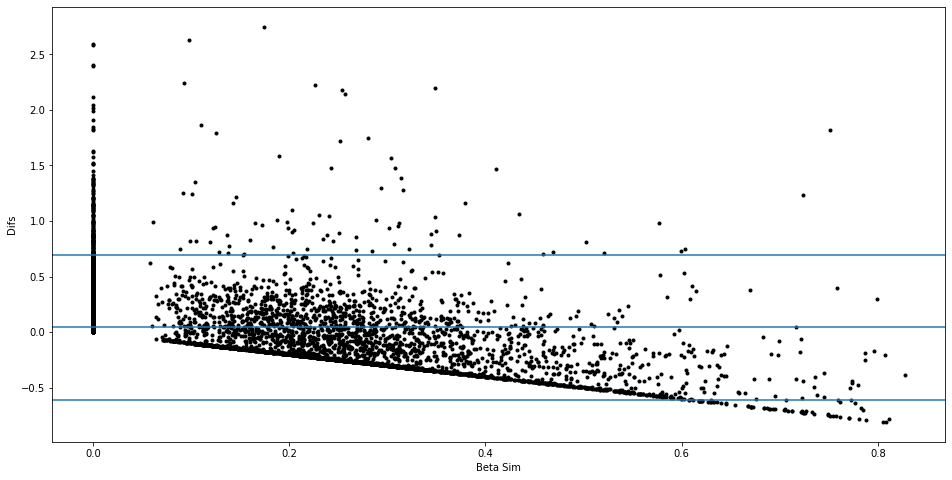

In [40]:
blandAltamGraph(ba, summary)

### MIXTURE

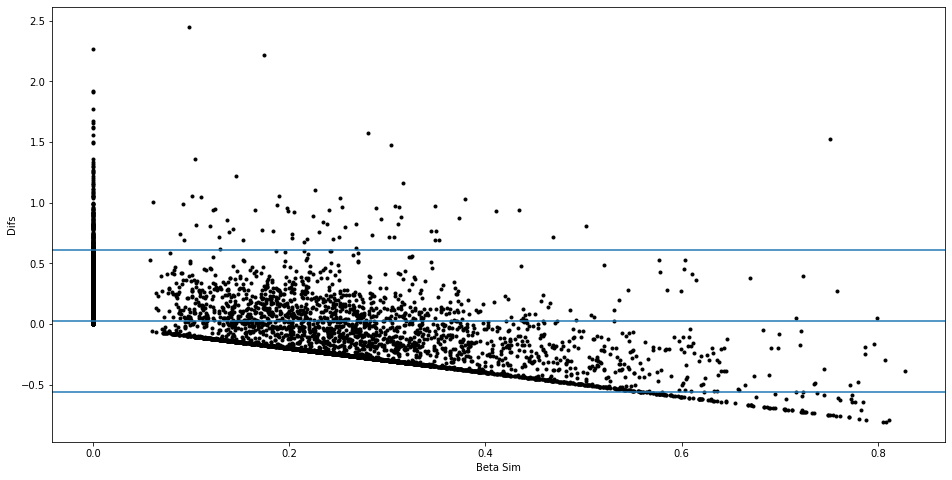

In [41]:
blandAltamGraph(ba2, summary2)